# **COVID-19 Studying Effect of Lock-down using General and Bayesian Analysis**



---



---



In [0]:
### Following data is downloading the global COVID-19 data repository from the John Hopkins University
data<-read.csv(file='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',head=TRUE)



---



---



#**Analysis for India**

In [0]:
India_data<-data[data$Country.Region=='India',]

In [0]:
names(India_data)

[1] "Province.State" "Country.Region" "Lat"            "Long"          
  [5] "X1.22.20"       "X1.23.20"       "X1.24.20"       "X1.25.20"      
  [9] "X1.26.20"       "X1.27.20"       "X1.28.20"       "X1.29.20"      
 [13] "X1.30.20"       "X1.31.20"       "X2.1.20"        "X2.2.20"       
 [17] "X2.3.20"        "X2.4.20"        "X2.5.20"        "X2.6.20"       
 [21] "X2.7.20"        "X2.8.20"        "X2.9.20"        "X2.10.20"      
 [25] "X2.11.20"       "X2.12.20"       "X2.13.20"       "X2.14.20"      
 [29] "X2.15.20"       "X2.16.20"       "X2.17.20"       "X2.18.20"      
 [33] "X2.19.20"       "X2.20.20"       "X2.21.20"       "X2.22.20"      
 [37] "X2.23.20"       "X2.24.20"       "X2.25.20"       "X2.26.20"      
 [41] "X2.27.20"       "X2.28.20"       "X2.29.20"       "X3.1.20"       
 [45] "X3.2.20"        "X3.3.20"        "X3.4.20"        "X3.5.20"       
 [49] "X3.6.20"        "X3.7.20"        "X3.8.20"        "X3.9.20"       
 [53] "X3.10.20"       "X3.11.20"       "X3.12.20"       "X3.13.20"      
 [57] "X3.14.20"       "X3.15.20"       "X3.16.20"       "X3.17.20"      
 [61] "X3.18.20"       "X3.19.20"       "X3.20.20"       "X3.21.20"      
 [65] "X3.22.20"       "X3.23.20"       "X3.24.20"       "X3.25.20"      
 [69] "X3.26.20"       "X3.27.20"       "X3.28.20"       "X3.29.20"      
 [73] "X3.30.20"       "X3.31.20"       "X4.1.20"        "X4.2.20"       
 [77] "X4.3.20"        "X4.4.20"        "X4.5.20"        "X4.6.20"       
 [81] "X4.7.20"        "X4.8.20"        "X4.9.20"        "X4.10.20"      
 [85] "X4.11.20"       "X4.12.20"       "X4.13.20"       "X4.14.20"      
 [89] "X4.15.20"       "X4.16.20"       "X4.17.20"       "X4.18.20"      
 [93] "X4.19.20"       "X4.20.20"       "X4.21.20"       "X4.22.20"      
 [97] "X4.23.20"       "X4.24.20"       "X4.25.20"       "X4.26.20"      
[101] "X4.27.20"       "X4.28.20"       "X4.29.20"       "X4.30.20"

We'll firstly need to preprocess the data into proper format

In [0]:
dats=as.Date(names(India_data[-c(1:4)]), format = "X%m.%d.%y")

India_data1<-cbind.data.frame(Date=dats,Cases=t(India_data[-c(1:4)]))
India_incid<-diff(India_data1$`132`)
n<-length(India_incid)  

India_data2<-cbind.data.frame(Dates=dats[2:length(dats)],India_incid=India_incid,Cases=India_data1$`132`[2:(n+1)])
colnames(India_data2)<-c("Dates","Incidence","Total_Confirmed_Cases")

In [0]:
print(India_data2)

        Dates Incidence Total_Confirmed_Cases
1  2020-01-23         0                     0
2  2020-01-24         0                     0
3  2020-01-25         0                     0
4  2020-01-26         0                     0
5  2020-01-27         0                     0
6  2020-01-28         0                     0
7  2020-01-29         0                     0
8  2020-01-30         1                     1
9  2020-01-31         0                     1
10 2020-02-01         0                     1
11 2020-02-02         1                     2
12 2020-02-03         1                     3
13 2020-02-04         0                     3
14 2020-02-05         0                     3
15 2020-02-06         0                     3
16 2020-02-07         0                     3
17 2020-02-08         0                     3
18 2020-02-09         0                     3
19 2020-02-10         0                     3
20 2020-02-11         0                     3
21 2020-02-12         0           

The virus starts its effect in each country at different times. As we deal with a regression model, it would be appropriate to subset our data from a time after the first pateint appears. But instead of the first onset date, we'll take the date after which the growth of cases become consistent.

In [0]:
India_data2<-subset(India_data2,Dates>="2020-03-05")

In [0]:
rownames(India_data2)=1:nrow(India_data2) #To reset the index

In [0]:
India_data2$Time<-1:nrow(India_data2) 
India_data2$Time2=India_data2$Time^2
India_data2$lock_down<-0
India_data2$lock_down[India_data2$Dates>="2020-03-25"]<-1

Changes in natural log are nearly equivalent to percentage change. If the situation is one in which the percentage changes are potentially large enough for this approximation to be inaccurate, it is better to use log units rather than percentage units, because this takes compounding into account in a systematic way, and it is symmetric in terms of sequences of gains and losses.  A diff-log of -0.5 followed by a diff-log of +0.5 takes you back to your original position, whereas a 50% loss followed by a 50% gain (or vice versa) leaves you in a worse position.

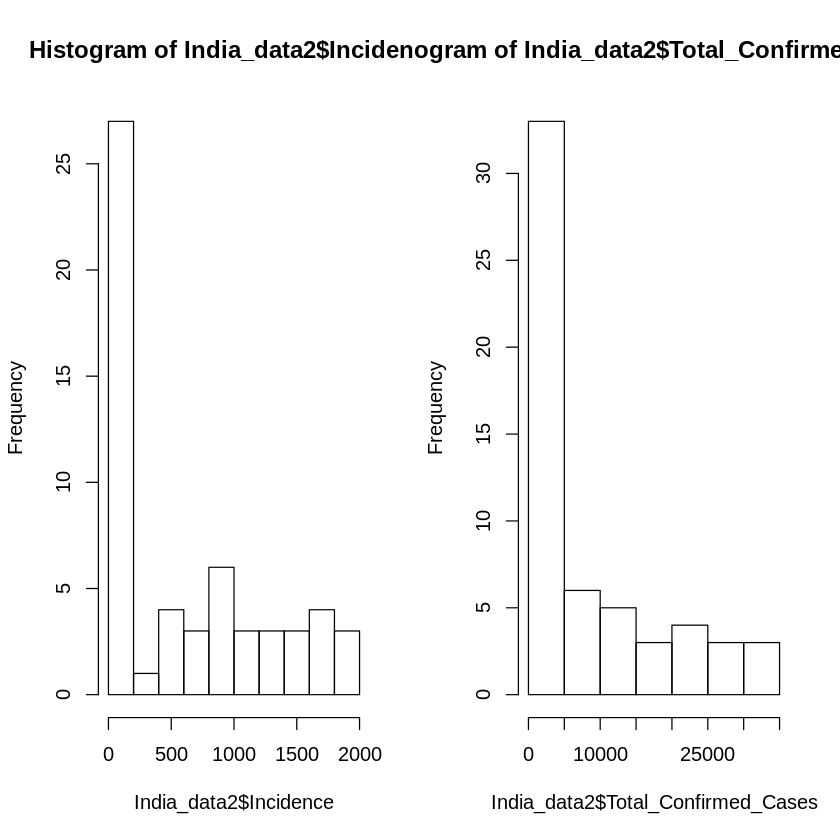

In [0]:
par(mfrow=c(1,2))
hist(India_data2$Incidence);hist(India_data2$Total_Confirmed_Cases)
par(mfrow=c(1,1))

These graphs show that Incidence and Total Confirmed Cases are right skewed. This suggests using a log to kind of normalize the values.

In [0]:
India_data2$ln_rt[2:nrow(India_data2)]<-diff(log(India_data2$Total_Confirmed_Cases))

Taking log converts multiplicative relationships to additive relationships, and also converts exponential trends to linear trends.  By taking logarithms of variables which are multiplicatively related and/or growing exponentially over time, we can often explain their behavior with linear models. It straightens out exponential growth patterns and reduces heteroscedasticity (i.e., stabilizes variance). Also taking a log is preferred if data is skewed as obtained in the histograms above.

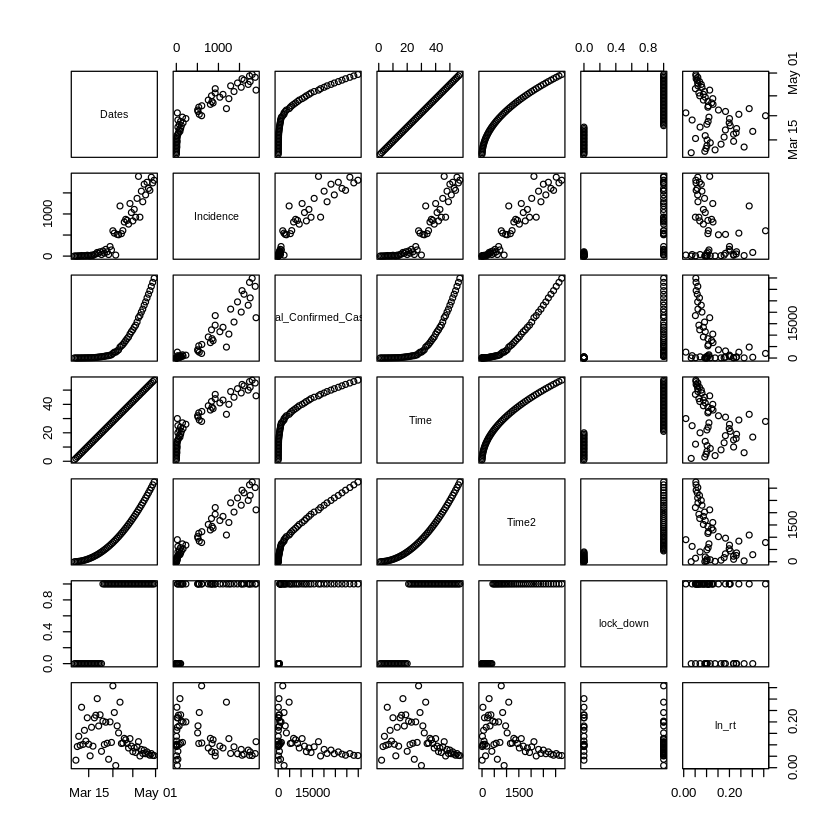

In [0]:
pairs(India_data2)

These plots above show the scatterplots for each variable-combination of a data frame and help us take a brief look. I have obtained a better look below.

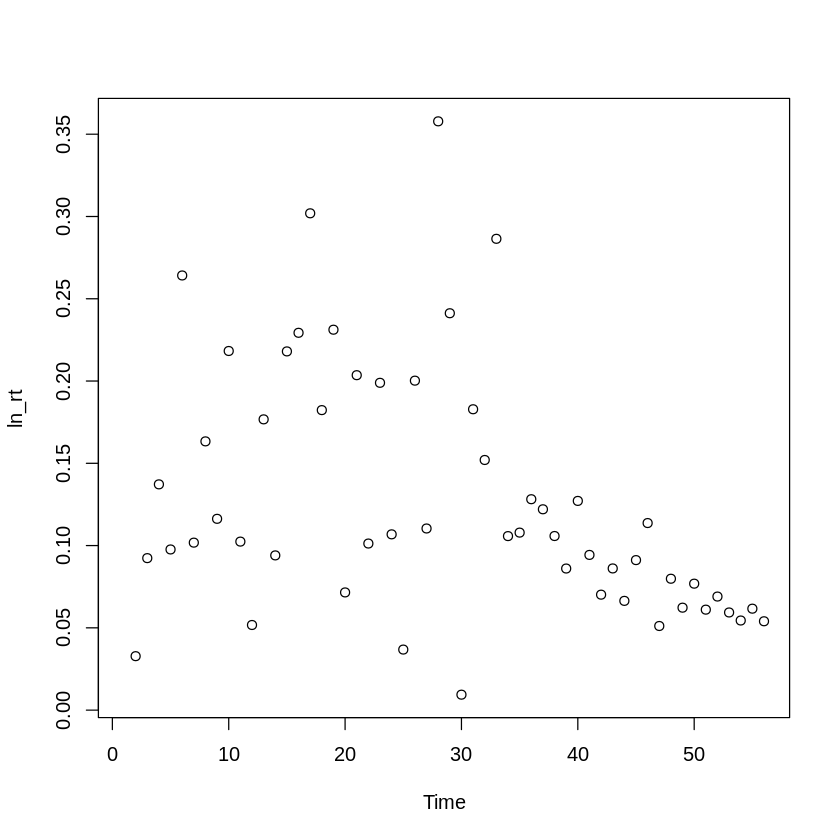

In [0]:
plot(ln_rt~Time,data=India_data2)

The above scatterplot shows ln_rt to be widely scattered across time. A linear relation doesn't seem to be well suited here.

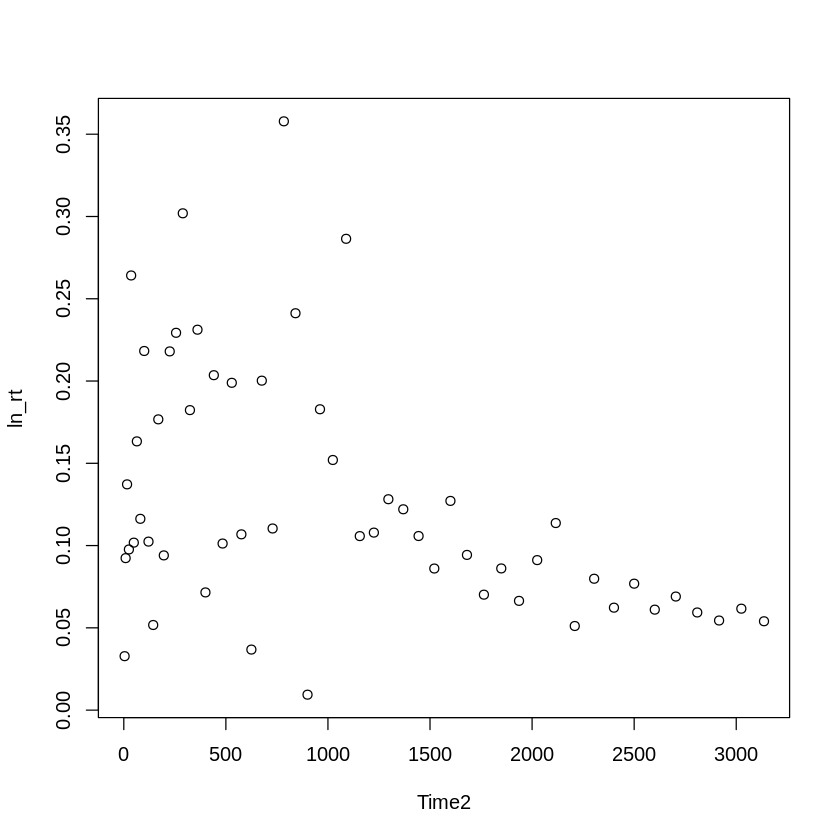

In [0]:
plot(ln_rt~Time2,data=India_data2)

Compared to Time, the scatter plot of Time^2 shows better linear relation, atleast in the later part of the graph.

In [0]:
fit<-lm(ln_rt~Time+I(Time^2)+lock_down
        ,data=India_data2)
summary(fit)


Call:
lm(formula = ln_rt ~ Time + I(Time^2) + lock_down, data = India_data2)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.138954 -0.036580 -0.008649  0.026105  0.208030 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  9.627e-02  3.425e-02   2.811  0.00692 **
Time         6.830e-03  3.392e-03   2.014  0.04913 * 
I(Time^2)   -1.302e-04  4.496e-05  -2.896  0.00549 **
lock_down   -3.564e-02  3.999e-02  -0.891  0.37683   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06513 on 53 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.2894,	Adjusted R-squared:  0.2492 
F-statistic: 7.194 on 3 and 53 DF,  p-value: 0.0003868


In [0]:
#### This analysis indicates that lockdown may reduce the disease progression - but it is not statistically significant.

In [0]:
round(confint(fit),6) #Confidence Interval

2.5 %     97.5 %   
(Intercept)  0.023033  0.162224
Time         0.000357  0.014211
I(Time^2)   -0.000233 -0.000046
lock_down   -0.116806  0.044276

In [0]:
len=length(India_data2$ln_rt)

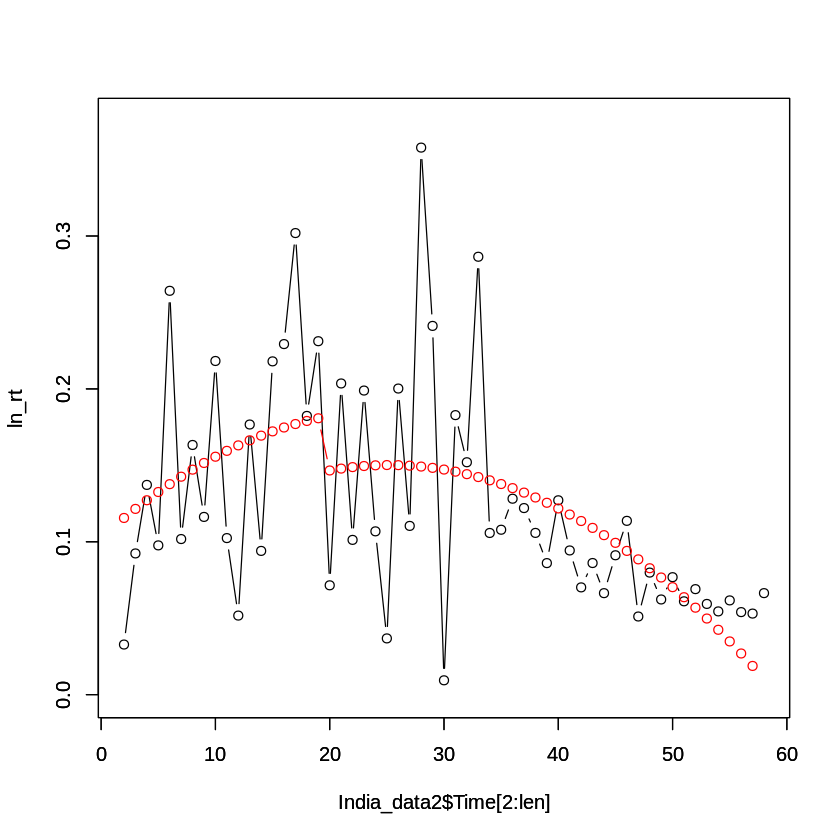

In [0]:
plot(India_data2$Time[2:len],India_data2$ln_rt[2:len],ylim=c(0,0.375),type="b",ylab="ln_rt")
par(new=TRUE)
plot(India_data2$Time[2:len],fit$fitted.values[2:len],ylim=c(0,0.375),col="Red",type="b",ylab="ln_rt")


The black line in the above plot shows the observed ln_rt values across time. The red line is for the predicted values using the simple OLS lm model above. The basic trend is captured but the variability is not as observed by this graph. This might show its effect in the residuals.

In [0]:
shapiro.test(fit$residuals)


	Shapiro-Wilk normality test

data:  fit$residuals
W = 0.95564, p-value = 0.03824


OLS Regression has the assumption that errors are independently and identically distributed as normal random variables with mean zero and constant variance. But that assumption is clearly not satisfied as can be seen using the above Shapiro-Wilk normality test.

If this model is correct, the residuals and fitted values should be uncorrelated, and the expected value of the residuals is zero. We apply the scatterplot of residuals versus fitted values, which provides an additional visual check of the model adequacy.

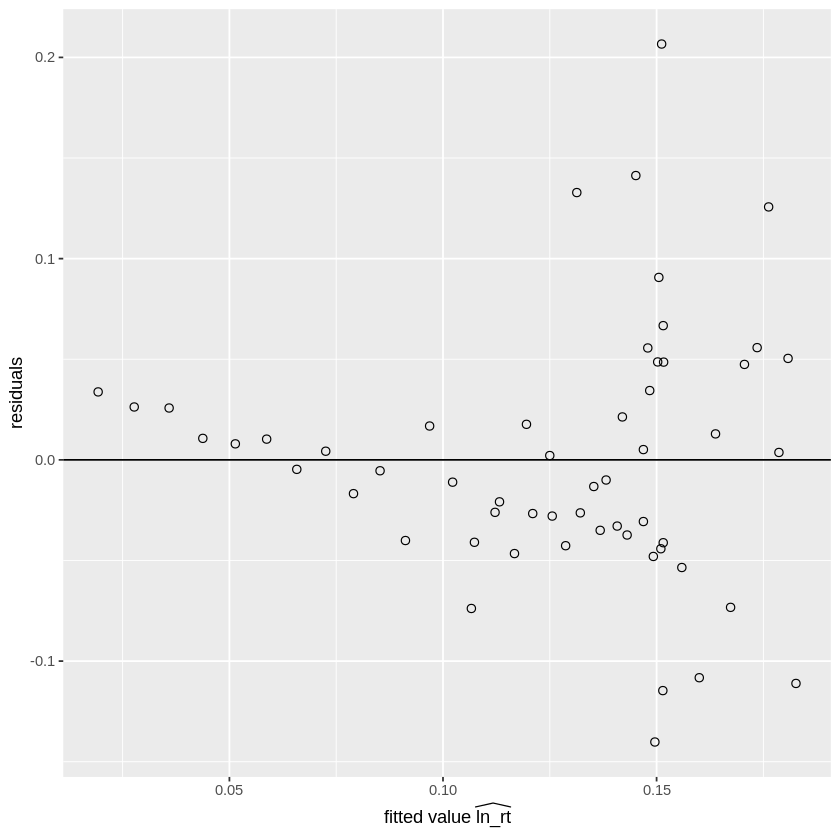

In [0]:
# Combine residuals and fitted values into a data frame
result = data.frame(fitted_values = fitted.values(fit),
                    residuals = residuals(fit))

# Load library and plot residuals versus fitted values
library(ggplot2)
ggplot(data = result, aes(x = fitted_values, y = residuals)) +
  geom_point(pch = 1, size = 2) + 
  geom_abline(intercept = 0, slope = 0) + 
  xlab(expression(paste("fitted value ", widehat(ln_rt)))) + 
  ylab("residuals")

The residual plot suggests that this linear regression is not a reasonable approximation.

In [0]:
install.packages("mvtnorm")

Now we'll go for a Bayesian Regression analysis using conjugate prior of Normal-Inverse-Gamma

In [0]:
### Bayesian Regression Detail Implementation 
#Using Conjugate Prior

India_data3=na.omit(India_data2) #Without the first row having NA corresponding to ln_rt
rP<-India_data3$ln_rt
n<-length(India_data3$ln_rt)
Intercept<-rep(1,n)
f<-cbind(Intercept,India_data3$Time,India_data3$Time2,India_data3$lock_down)

## parameters of prior distribution
nms<-c("alpha","beta1","beta2","beta3")
k<-length(nms)
beta_0<-rep(0,k)
Lambda_0<-diag(1,nrow=length(beta_0))
a_0<-0.1 #These values a_0 and b_0 are very biased
b_0<-0.01

## parameters of posterior distribution
Lambda_pi<-t(f)%*%f+Lambda_0
Lambda_pi_inv<-solve(Lambda_pi)
beta_pi<-Lambda_pi_inv%*%(t(f)%*%rP
                          +Lambda_0%*%beta_0)
rownames(beta_pi)<-nms
a_pi<-a_0+n/2
err <-(rP-f%*%beta_pi)
b_pi<-b_0+0.5*t(err)%*%(err)

## Simulate from Posterior distribution
set.seed(1)
library(mvtnorm)
N.sim<-25000
burnin<-10000
sigma<-rep(NA,N.sim)
beta.draws <- matrix(NA
                     , nrow=N.sim
                     , ncol=k)
colnames(beta.draws)<-nms

for(i in 1:(N.sim+burnin)){
  sigma_2_star<-1/rgamma(1,a_pi,b_pi)
  S <- sigma_2_star*Lambda_pi_inv
  beta_star<-rmvnorm(1,mean = beta_pi
                     ,sigma = S)
  if(i >burnin){
    sigma[i-burnin]<-sqrt(sigma_2_star)
    beta.draws[i-burnin,]<-beta_star
  }
}
theta<-cbind(beta.draws,sigma)

#head(round(theta,digits = 3))
post_median<-apply(theta,2,median)
post_mean <- apply(theta,2,mean)
post_sd   <- apply(theta,2,sd)
post_band <- apply(theta,2,quantile
                   ,prob=c(0.025,0.975))
post_band2 <- apply(theta,2,quantile
                   ,prob=c(0.05,0.95))
post_sumry<-rbind( post_median     
                   ,post_mean
                   ,post_sd
                   ,post_band
                   ,post_band2)
rownames(post_sumry)<-c("median"
                        ,"mean"
                        ,"sd"
                        ,"2.5%"
                        ,"97.5%"
                        ,"5%"
                        ,"95%")
round(post_sumry,digits = 6)


alpha    beta1    beta2     beta3     sigma   
median 0.080459 0.007943 -0.000146 -0.036208 0.065943
mean   0.080410 0.007917 -0.000146 -0.036007 0.066432
sd     0.029896 0.002909  0.000040  0.034006 0.006322
2.5%   0.021577 0.002194 -0.000225 -0.102994 0.055390
97.5%  0.139052 0.013577 -0.000067  0.031366 0.080297
5%     0.031409 0.003105 -0.000212 -0.092028 0.056997
95%    0.129469 0.012677 -0.000079  0.019806 0.077532

In the above, alpha, beta1, beta2, beta3 are the coefficient values corresponding to the Intercept, Time, Time2, and lock_down respectively.

As in the simple linear aggression, the posterior estimates from the conjugate prior, that are in the table, are almost equivalent to the numbers reported from the lm function in R, or using the confidence function in the OLS estimates. 

Note the values obtained corresponding to beta3 above. This is the value corresponding to lock_down. You can see from the 90% CI i.e. 5% and 95% values that 0 falls in between them. This suggests the low significance of lock_down for predicting ln_rt.

In [0]:
India_data3$pred=post_sumry[2,1]+post_sumry[2,2]*India_data3$Time+post_sumry[2,3]*India_data3$Time2+post_sumry[2,4]*India_data3$lock_down
#Storing the fitted values according to the above model to plot them later

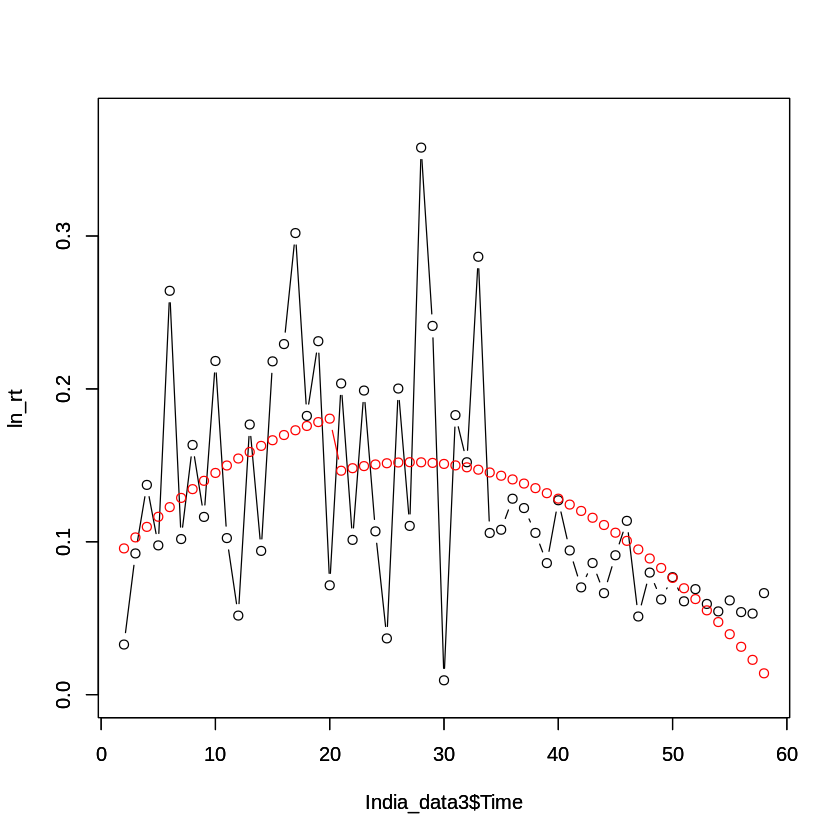

In [0]:
plot(India_data3$Time,India_data3$ln_rt,ylim=c(0,0.375),type="b",ylab="ln_rt")
par(new=TRUE)
plot(India_data3$Time,India_data3$pred,ylim=c(0,0.375),col="Red",type="b",ylab="ln_rt")


This graph is also almost the same as we obtained in the case of OLS.

Instead of the Normal-Inverse-Gamma prior lets try the Normal-half-Cauchy prior. As half cauchy is generally suggested to work better than inverse gamma.

In [0]:
#Almost same as above. Just using Half-Cauchy(0,1) instead of the Inverse gamma with 
#biased supply of hyperparameters above 
### Bayesian Regression Detail Implementation 


India_data3=na.omit(India_data2) #Without the first row having NA corresponding to ln_rt
rP<-India_data3$ln_rt
n<-length(India_data3$ln_rt)
Intercept<-rep(1,n)
f<-cbind(Intercept,India_data3$Time,India_data3$Time2,India_data3$lock_down)

## parameters of prior distribution
nms<-c("alpha","beta1","beta2","beta3")
k<-length(nms)
beta_0<-rep(0,k)
Lambda_0<-diag(1,nrow=length(beta_0))
a_0<-0 
b_0<-1

## parameters of posterior distribution
Lambda_pi<-t(f)%*%f+Lambda_0
Lambda_pi_inv<-solve(Lambda_pi)
beta_pi<-Lambda_pi_inv%*%(t(f)%*%rP
                          +Lambda_0%*%beta_0)
rownames(beta_pi)<-nms
a_pi<-a_0+n/2
err <-(rP-f%*%beta_pi)
b_pi<-b_0+0.5*t(err)%*%(err)

## Simulate from Posterior distribution
set.seed(1)
library(mvtnorm)
N.sim<-50000
burnin<-20000
sigma<-rep(NA,N.sim)
beta.draws <- matrix(NA
                     , nrow=N.sim
                     , ncol=k)
colnames(beta.draws)<-nms

for(i in 1:(N.sim+burnin)){
  sigma_2_star<-1/abs(rcauchy(1,0,1)) #Half cauchy (0,1) = abs( Cauchy (0,1) )
  S <- sigma_2_star*Lambda_pi_inv
  beta_star<-rmvnorm(1,mean = beta_pi
                     ,sigma = S)
  if(i >burnin){
    sigma[i-burnin]<-sqrt(sigma_2_star)
    beta.draws[i-burnin,]<-beta_star
  }
}
theta<-cbind(beta.draws,sigma)

#head(round(theta,digits = 3))
post_median<-apply(theta,2,median)
post_mean <- apply(theta,2,mean)
post_sd   <- apply(theta,2,sd)
post_band <- apply(theta,2,quantile
                   ,prob=c(0.025,0.975))
post_band2 <- apply(theta,2,quantile
                   ,prob=c(0.05,0.95))
post_sumry<-rbind( post_median     
                   ,post_mean
                   ,post_sd
                   ,post_band
                   ,post_band2)
rownames(post_sumry)<-c("median"
                        ,"mean"
                        ,"sd"
                        ,"2.5%"
                        ,"97.5%"
                        ,"5%"
                        ,"95%")
round(post_sumry,digits = 6)


alpha     beta1     beta2     beta3     sigma   
median  0.077597  0.008365 -0.000154 -0.034899 1.001946
mean    0.073713  0.008403 -0.000160 -0.026012 1.413287
sd      1.305935  0.119552  0.001678  1.457882 2.371090
2.5%   -1.527663 -0.144498 -0.002384 -1.840574 0.200555
97.5%   1.644276  0.164765  0.001965  1.787520 5.009733
5%     -1.010884 -0.096973 -0.001661 -1.278675 0.283362
95%     1.168632  0.115668  0.001311  1.190087 3.543849

In these results also, the beta3's 90% interval contains 0 implying less significance of lock down like in the result above.

Let us explore another package - the rstan package for obtaining the results using Bayesian analysis

In [0]:
install.packages("rstan")

In [0]:
install.packages("recipes")

Using rstan without any specification of prior and residuals following normality assumption.

In [0]:
library("rstan")
library("recipes")

In [0]:
fit<-recipe(ln_rt~Time+Time2+lock_down,data=India_data3)%>%
  prep(data = India_data3, retain = TRUE) 

X=juice(fit, all_predictors(), composition = "matrix")
new_X=X
y=drop(juice(fit, all_outcomes(), composition = "matrix"))
N=length(India_data3$ln_rt)
K=ncol(X)

write("// Stan model for simple linear regression
// Linear Model with Normal Errors
data {
  // number of observations
  int N;
  // response
  vector[N] y;
  // number of columns in the design matrix X
  int K;
  // design matrix X
  // should not include an intercept
  matrix [N, K] X;
  matrix[N,K] new_X; //the matrix for the predicted values

}
parameters {
  // regression coefficient vector
  real alpha;
  vector[K] beta;
  real < lower = 0 > sigma;
}
model {
  y ~ normal(alpha + X * beta, sigma);
}
generated quantities {

  vector[N] y_pred;
  real y_rep[N];
  
  y_pred=new_X*beta; //the y values predicted by the model
  
  
  for (n in 1:N) {
  y_rep[n] = normal_rng(alpha + X[n] * beta, sigma);
  }
  
} // The posterior predictive distribution",

"stan_model1.stan")

stan_data <- list(N = N, K= K, X = X, new_X = new_X, y = y)
#stanc("stan_model1.stan")
stan_model1 <- "stan_model1.stan"
fit <- stan(file = stan_model1, data = stan_data, warmup = 5000, iter = 10000, chains = 4, cores = 2, thin = 5, control = list(max_treedepth = 15))

The model above considers flat prior and the assumption of errors following normality.

In [0]:
summary(as.matrix(fit)[,1:5])

     alpha             beta[1]             beta[2]          
 Min.   :-0.02588   Min.   :-0.004714   Min.   :-3.115e-04  
 1st Qu.: 0.06849   1st Qu.: 0.004983   1st Qu.:-1.717e-04  
 Median : 0.09129   Median : 0.007378   Median :-1.400e-04  
 Mean   : 0.09193   Mean   : 0.007336   Mean   :-1.400e-04  
 3rd Qu.: 0.11523   3rd Qu.: 0.009670   3rd Qu.:-1.084e-04  
 Max.   : 0.21250   Max.   : 0.018293   Max.   : 3.082e-05  
    beta[3]              sigma        
 Min.   :-0.174199   Min.   :0.05006  
 1st Qu.:-0.063805   1st Qu.:0.06190  
 Median :-0.036877   Median :0.06627  
 Mean   :-0.036483   Mean   :0.06682  
 3rd Qu.:-0.008332   3rd Qu.:0.07089  
 Max.   : 0.098152   Max.   :0.10397  

In [0]:
install.packages("bayesplot")

In [0]:
library(bayesplot)

Now let us perform evaluations on the model.

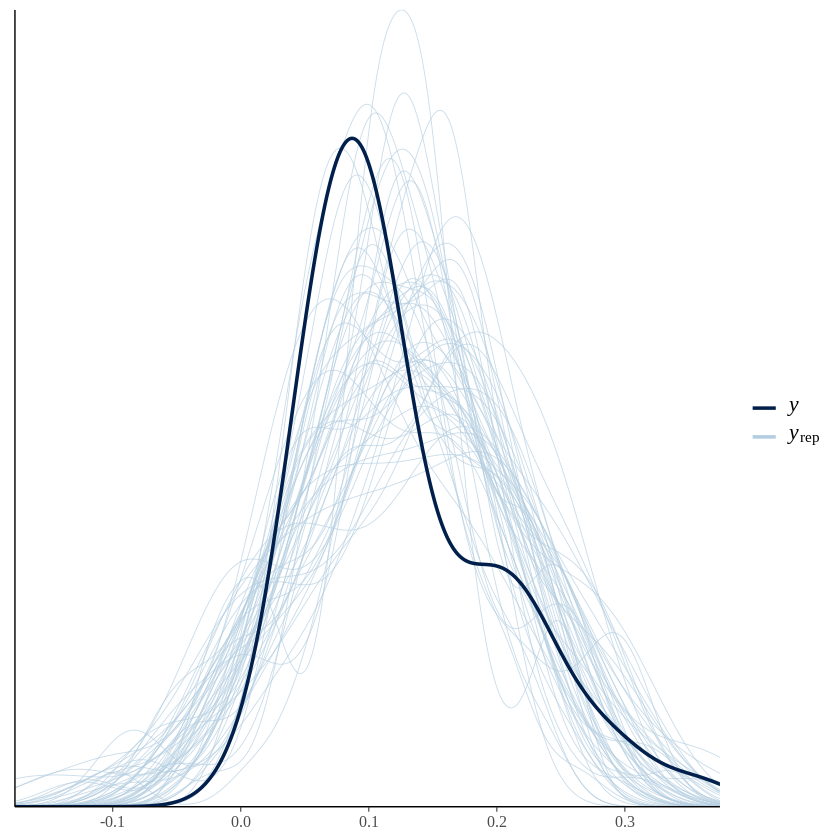

In [0]:
y_rep <- as.matrix(fit, pars = "y_rep")
ppc_dens_overlay(y, y_rep[1:56, ])

The above graph is a look at the posterior predictives. If our model is a good fit then we should be able to use it to generate data that looks a lot like the data we observed. The dark blue line shows the observed data while the light blue lines are simulations from the posterior predictive distribution. The light blue lines really look similar to the dark one suggesting a good model.

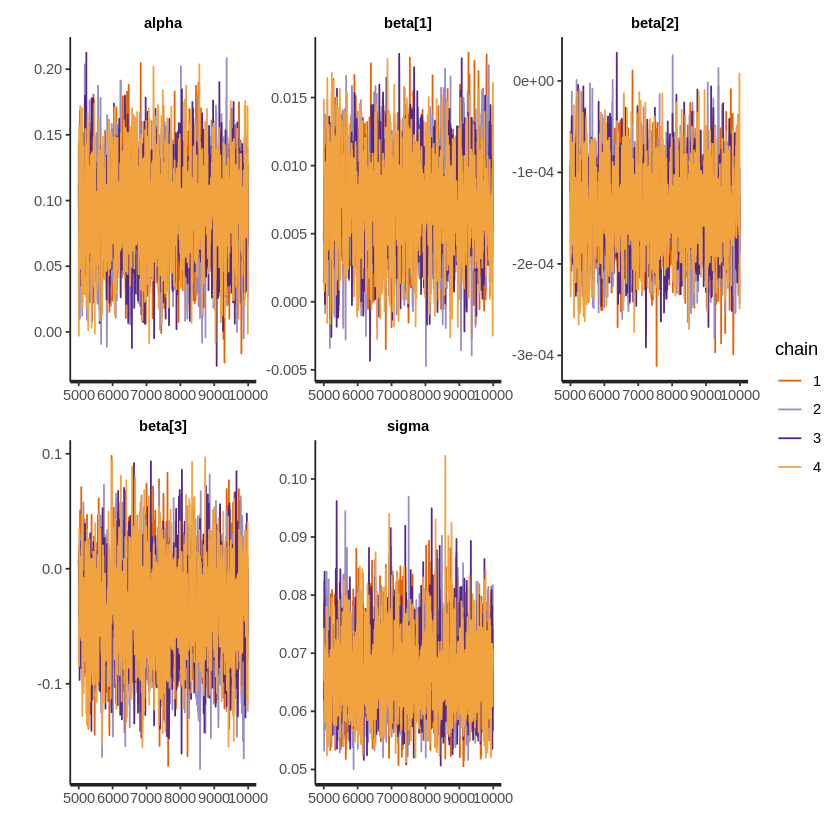

In [0]:
stan_trace(fit,pars=c("alpha","beta","sigma"))

The trace plots show sequential draws from the posterior distribution. Ideally we want the chains in each trace plot to be stable i.e. centered around one value and well-mixed. A clear sign of non convergence with a traceplot occurs when we observe some trend in the sample space.

These traceplots show stability and are well mixed which is a good sign for the model.

Warning message:
“Ignoring unknown parameters: fun.y”
No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`



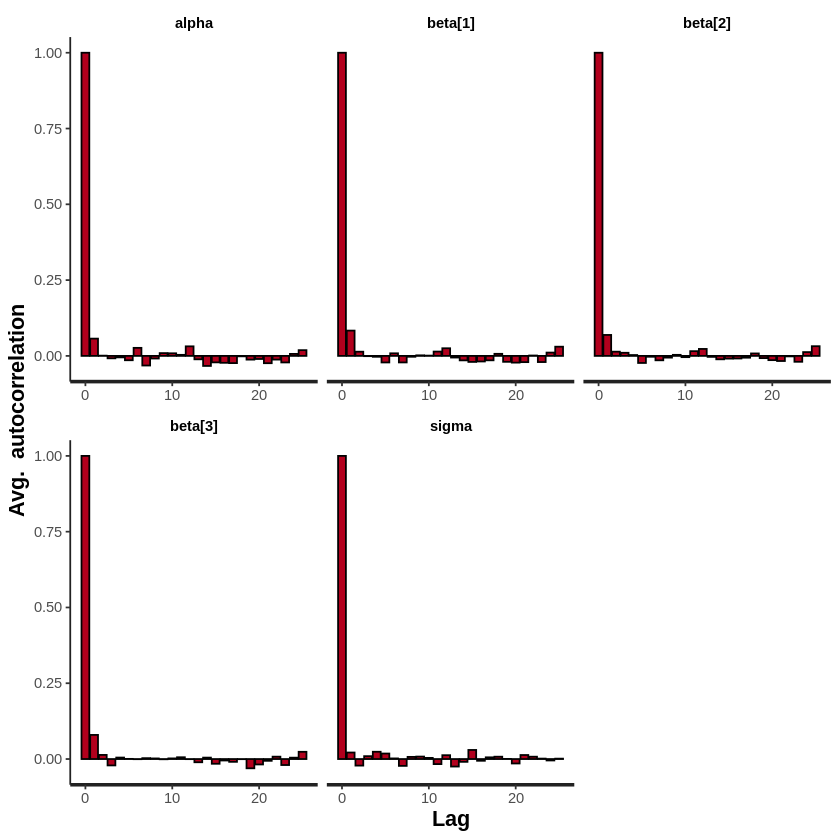

In [0]:
stan_ac(fit,pars=c("alpha","beta","sigma"))


In order to be able to generate unbiased estimates of parameters, the MCMC samples should be independent (uncorrelated). To ensure that, after performing various runs, I tried increasing thinning to get uncorrelated samples as suggested by the ACF plots above. Thinning is the number of iterations to count before storing a sample. 

The chain’s correlation with successive lags of the chain are plotted. In the above plots, the correlation is low to begin with and then just bounces around zero after. This is what we want to achieve later also in every ACF plot.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



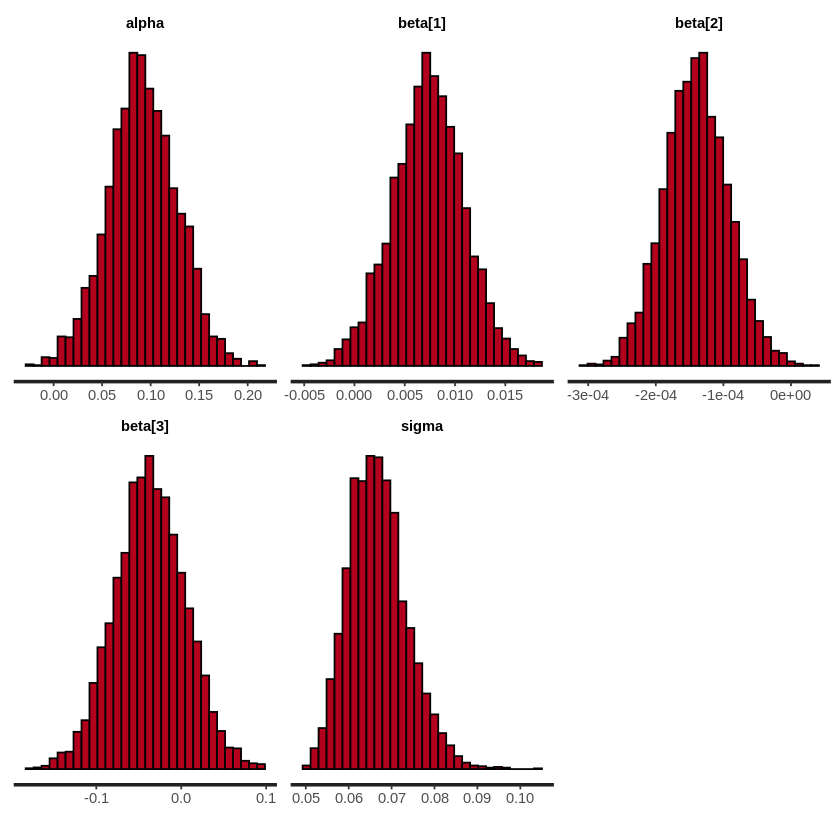

In [0]:
stan_hist(fit,pars=c("alpha","beta","sigma"))

The histograms suggest the coefficient values to be centered at some value and give us an idea of their distribution.

In [0]:
posterior <- extract(fit)
#Prob that lock_down < 0 | Data
sum(posterior$beta[,3]<0)/length(posterior$beta[,3])

[1] 0.81325

With the above probability the lockdown is effective

In [0]:
#The 80 and 90% CI for beta3 i.e. corresponding to lock_down
round(quantile(posterior$beta[,3], probs = c(.1, .9)) ,6)
round(quantile(posterior$beta[,3], probs = c(.05, .95)) ,6)

10%       90% 
-0.090344  0.017237

5%       95% 
-0.103851  0.032084

All these results obtained above are okay, but as the residuals dont follow normality, lets see if they follow Laplace, so that we can do better analysis.

Warning message in log(f):
“NaNs produced”
Warning message in log(f):
“NaNs produced”
Warning message in log(f):
“NaNs produced”
Warning message in log(f):
“NaNs produced”


[1] -0.004887773  0.046384953

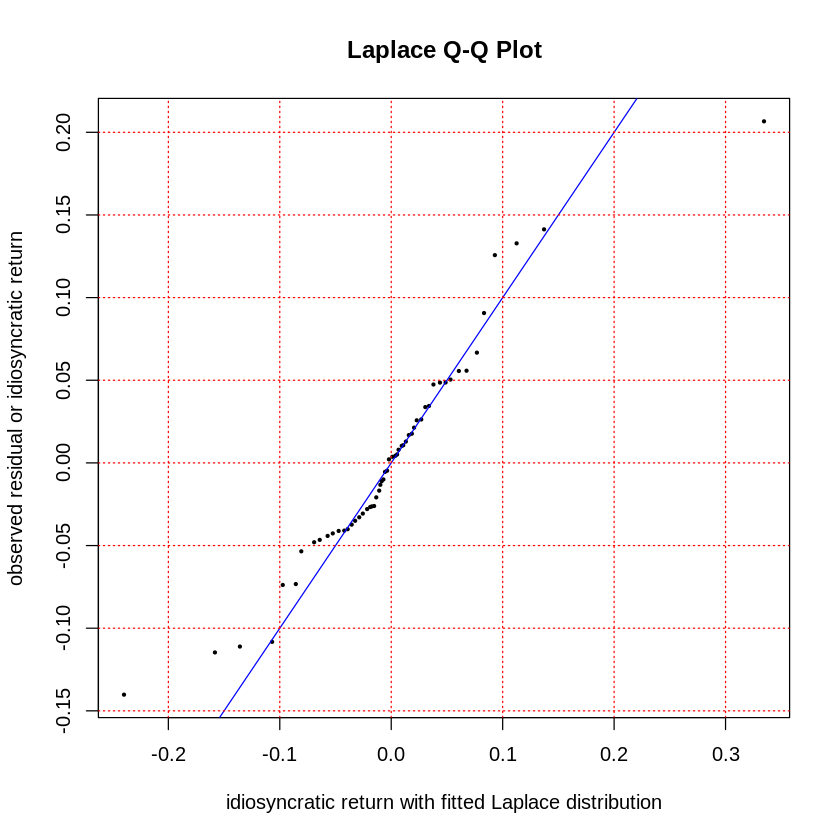

In [0]:
## density of Laplace distribution 
dlaplace<-function(x,mu,lambda){
  return(exp(-abs(x-mu)/lambda)/(2*lambda))
}
## The negative log-likelihood function
neg_log_likelihood<-function(data,para){
  mu<-para[1]
  lambda<-(para[2])
  f<-dlaplace(x=data
              ,mu=mu
              ,lambda=lambda)
  return(-sum(log(f))) 
}

## initial parameters
para.init<-c(0,1)

## residual or idiosyncratic return 
## from capm_portf
e<-summary(fit)$residual

mle<-optim(para.init
           ,neg_log_likelihood
           ,data=e)

mle$par
## The following function simulate from 
## the fitted Laplace distribution
rlaplace<-function(n,mu,lmbda){
  # n : sample size
  # mu: location parameter
  # lambda : scale parameter
  u<-runif(n,-0.5,0.5)
  sgn<-rep(NA,n)
  for(i in 1:n){
    if(u[i]<0) sgn[i]<--1
    if(u[i]>0) sgn[i]<-1
    if(u[i]==0) sgn[i]<-0
  }
  r<-mu-lmbda*sgn*log(1-2*abs(u))
  return(r)
}

## simulate the result
set.seed(4155)
r.sim<-rlaplace(n=1000
                ,mu=mle$par[1]
                ,lmbda=mle$par[2])
qqplot(r.sim,e
       ,cex=0.5
       ,pch=20
       ,xlab="idiosyncratic return with fitted Laplace distribution"
       ,ylab="observed residual or idiosyncratic return"
       ,main="Laplace Q-Q Plot")

abline(a=0,b=1,col="blue")
grid(col="red")

The above Q-Q plot suggests that the errors almost follow Laplace.

This time we'll consider the Laplace errors instead of Normal

In [0]:
India_data3=na.omit(India_data2) #Remove NA values

In [0]:
fit<-recipe(ln_rt~Time+Time2+lock_down,data=India_data3)%>%
  prep(data = India_data3, retain = TRUE) 

X=juice(fit, all_predictors(), composition = "matrix")
new_X=X
y=drop(juice(fit, all_outcomes(), composition = "matrix"))
N=length(India_data3$ln_rt)
K=ncol(X)

In [0]:
library("rstan")
write("// Stan model for simple linear regression
// Linear Model with Laplace(Double Exponential) Errors
data {
  // number of observations
  int N;
  // response
  vector[N] y;
  // number of columns in the design matrix X
  int K;
  // design matrix X
  // should not include an intercept
  matrix [N, K] X;
  
}
parameters {
  // regression coefficient vector
  real alpha;
  vector[K] beta;
  real < lower = 0 > sigma;
}
model {
  alpha ~ cauchy(0,1);
  beta ~ cauchy(0,1);
  sigma ~ gamma(1,1);
  y ~ double_exponential(alpha + X * beta, sigma);
}
generated quantities {
  real y_rep[N];  
  
  for (n in 1:N) {
  y_rep[n] =double_exponential_rng(alpha + X[n] * beta, sigma);
  }
}
// The posterior predictive distribution",

"stan_model2.stan")

stan_data=list(N = N, K= K, X = X, new_X=new_X, y = y)
#stanc("stan_model2.stan")
stan_model2="stan_model2.stan"
fit=stan(file = stan_model2, data = stan_data, warmup = 10000, iter = 20000, chains = 4, cores = 2, thin = 10, control = list(max_treedepth = 15))

So we have the model ln_rt~Time+Time2+lock_down trained using Bayesian method, with the residuals following Laplace instead of Normal

In [0]:
summary(as.matrix(fit)[,1:5])

     alpha             beta[1]             beta[2]              beta[3]        
 Min.   :-0.01077   Min.   :-0.007257   Min.   :-2.689e-04   Min.   :-0.21996  
 1st Qu.: 0.06083   1st Qu.: 0.005618   1st Qu.:-1.577e-04   1st Qu.:-0.10892  
 Median : 0.08135   Median : 0.007903   Median :-1.295e-04   Median :-0.08223  
 Mean   : 0.08308   Mean   : 0.007809   Mean   :-1.286e-04   Mean   :-0.07800  
 3rd Qu.: 0.10423   3rd Qu.: 0.010177   3rd Qu.:-1.006e-04   3rd Qu.:-0.05137  
 Max.   : 0.22684   Max.   : 0.017626   Max.   : 4.816e-05   Max.   : 0.13513  
     sigma        
 Min.   :0.02977  
 1st Qu.:0.04322  
 Median :0.04726  
 Mean   :0.04784  
 3rd Qu.:0.05181  
 Max.   :0.08387  

The above summary is corresponding to the coefficients alpha, beta1, beta2, beta3 of Intercept, Time, Time2, lock_down respectively.

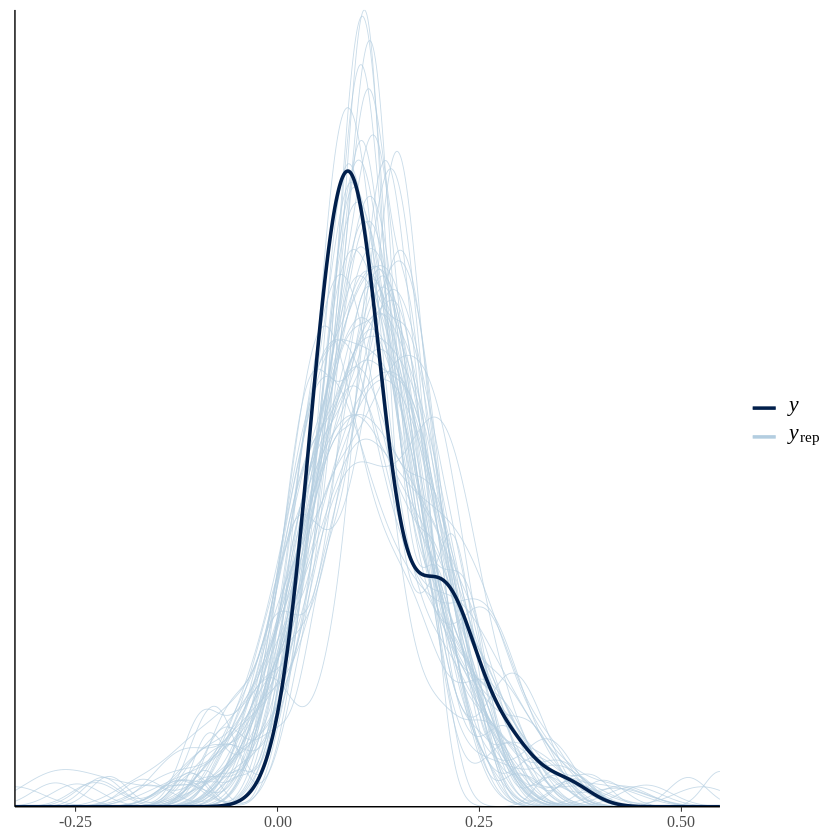

In [0]:
y_rep <- as.matrix(fit, pars = "y_rep")
ppc_dens_overlay(y, y_rep[1:56, ])

Posterior predictive checking suggests that the model is good.

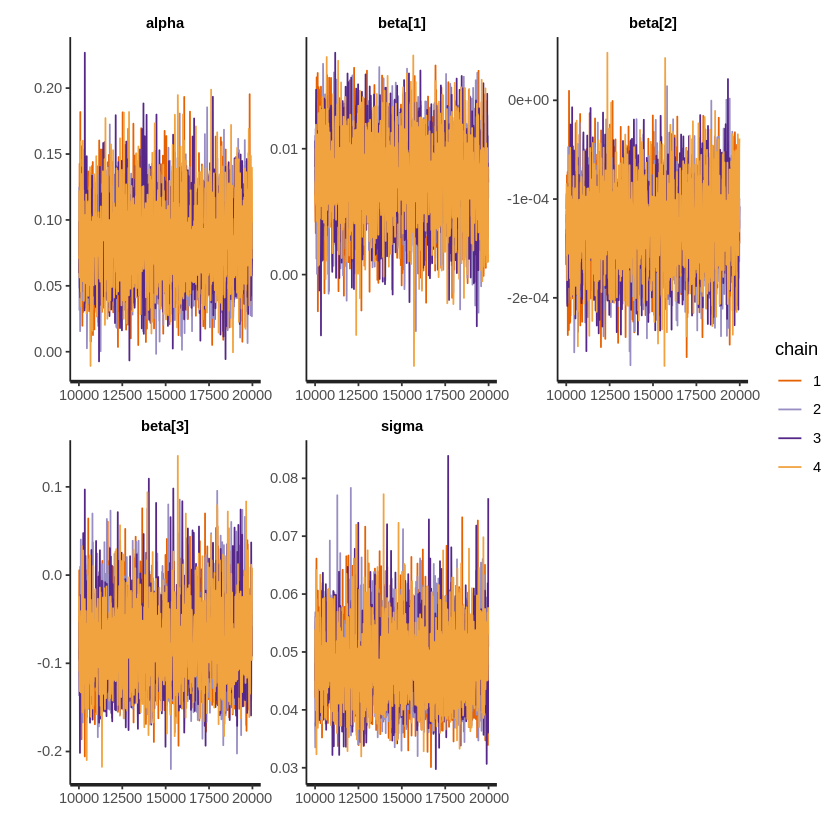

In [0]:
stan_trace(fit,pars=c("alpha","beta","sigma"))

The above trace plots suggest stability and hence suggest convergence

Warning message:
“Ignoring unknown parameters: fun.y”
No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`



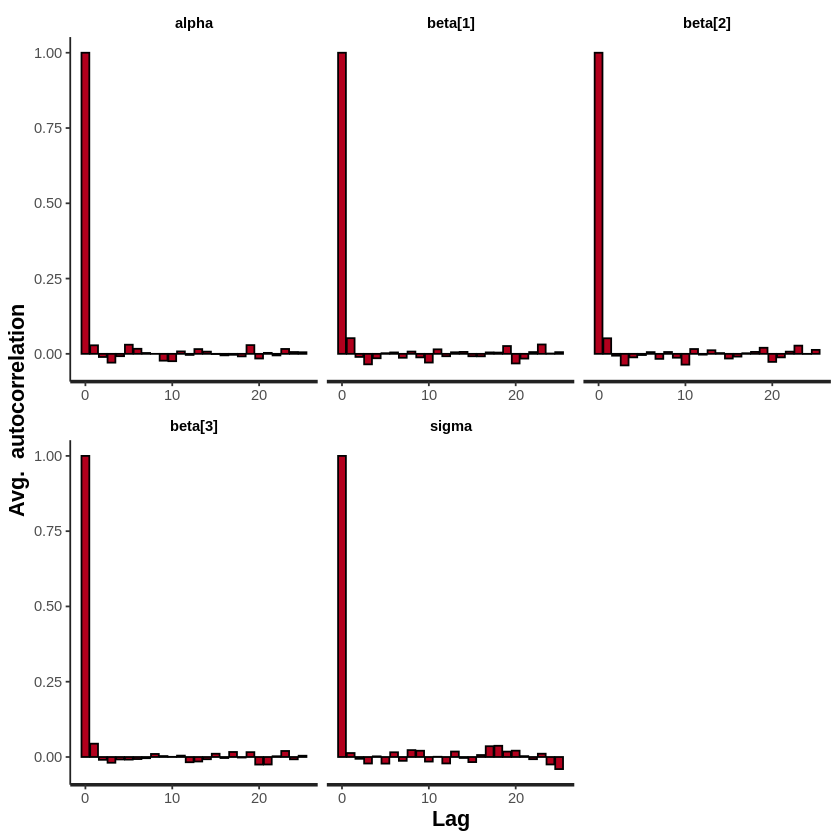

In [0]:
stan_ac(fit,pars=c("alpha","beta","sigma"))


ACF plots show no correlation between the samples which is a good thing.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



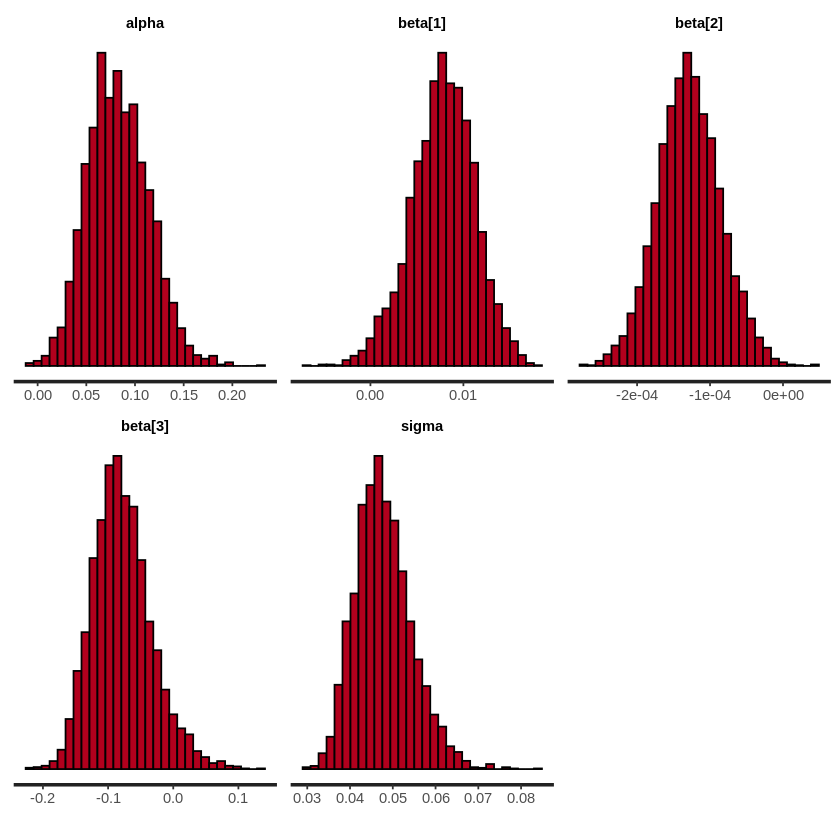

In [0]:
stan_hist(fit,pars=c("alpha","beta","sigma"))

These histograms give an idea of the distribution of coefficient values.

In [0]:
posterior <- extract(fit)
#Prob that lock_down < 0 | Data
sum(posterior$beta[,3]<0)/length(posterior$beta[,3])

[1] 0.9435

In [0]:
#The 80, 85 and 90% CI for beta3 i.e. corresponding to lock_down
round(quantile(posterior$beta[,3], probs = c(.1, .9)) ,6)
round(quantile(posterior$beta[,3], probs = c(.075, .925)) ,6)
round(quantile(posterior$beta[,3], probs = c(.05, .95)) ,6)

10%       90% 
-0.132386 -0.018925

7.5%     92.5% 
-0.138525 -0.009735

5%       95% 
-0.146150  0.004941

Bayesian inference makes it possible to analyse the uncertainty of crisis impacts. So with atleast 85% confidence we can say that the lockdown in India is effective in reducing the "percent increase" in cases.

Rather than the term of lock_down in the model suggested above, we can take (Time*lock_down). This would definitely yield a better model in both OLS and Bayesian terms. Because the effect of lockdown might vary with time. Also Time and lock_down might exhibit some multicollinearity. That effect would also be taken care of this way.

But rather than the above, let us this time rather consider to model the Total Confirmed Cases (or their log). This might give us a better outlook in the sense that as the cases go up, a small percentage change (nearly ln_rt) would mean a large number of cases. 


##**Main Analysis for India**

We might further take into account that the disease may take upto 14 days to show the symptoms. So based on that let us divide the lockdown period into 14 days intervals. So creating variables for each period.

In [0]:
#prd1, prd2, prd3 correspond to the 3 periods of 14 days each
India_data2$prd1<-0
India_data2$prd2<-0
India_data2$prd3<-0
India_data2$prd1[India_data2$Dates>="2020-03-25" & India_data2$Dates<="2020-04-07"]<-1
India_data2$prd2[India_data2$Dates>="2020-04-08" & India_data2$Dates<="2020-04-21"]<-1
India_data2$prd3[India_data2$Dates>="2020-04-22"]<-1

Fitting an OLS model below.

Note the change in model below. This time it is:

log(Total_Confirmed_Cases)~Time+I(prd1*Time)+I(prd2*Time)+I(prd3*Time)



In [0]:
fit<-lm(log(Total_Confirmed_Cases)~Time+I(prd1*Time)+I(prd2*Time)
        +I(prd3*Time),data=India_data2)
#Note that rather than just taking the periods, I've rather taken their product with time.
#This is because the effect of lockdown in a period won't be the same throughout the period.
#This can also be done with ln_rt
summary(fit)
shapiro.test(fit$residuals)


Call:
lm(formula = log(Total_Confirmed_Cases) ~ Time + I(prd1 * Time) + 
    I(prd2 * Time) + I(prd3 * Time), data = India_data2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.39030 -0.11560 -0.00698  0.12299  0.33117 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     3.121643   0.073546  42.445  < 2e-16 ***
Time            0.151031   0.006208  24.330  < 2e-16 ***
I(prd1 * Time)  0.007367   0.004444   1.658  0.10340    
I(prd2 * Time) -0.001528   0.004884  -0.313  0.75562    
I(prd3 * Time) -0.017138   0.005161  -3.321  0.00165 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1658 on 52 degrees of freedom
Multiple R-squared:  0.9952,	Adjusted R-squared:  0.9948 
F-statistic:  2688 on 4 and 52 DF,  p-value: < 2.2e-16



	Shapiro-Wilk normality test

data:  fit$residuals
W = 0.9881, p-value = 0.8471


We can see that the 3rd period was significantly effective in reducing the total number of covid cases.

(Also the residuals here follow normality)

Now lets try and find out the above results using Bayesian analysis (rstanarm package).

**Bayesian Regression**

In [0]:
install.packages("rstanarm")

In [0]:
library(rstanarm)

In [0]:
glm_post1 <- stan_glm(log(Total_Confirmed_Cases)~Time+I(prd1*Time)+I(prd2*Time)+I(prd3*Time)
                      ,data=India_data2, family=gaussian, iter=20000, thin =5)

In [0]:
summary(glm_post1)


Model Info:
 function:     stan_glm
 family:       gaussian [identity]
 formula:      log(Total_Confirmed_Cases) ~ Time + I(prd1 * Time) + I(prd2 * 
	   Time) + I(prd3 * Time)
 algorithm:    sampling
 sample:       8000 (posterior sample size)
 priors:       see help('prior_summary')
 observations: 57
 predictors:   5

Estimates:
                 mean   sd   10%   50%   90%
(Intercept)    3.1    0.1  3.0   3.1   3.2  
Time           0.2    0.0  0.1   0.2   0.2  
I(prd1 * Time) 0.0    0.0  0.0   0.0   0.0  
I(prd2 * Time) 0.0    0.0  0.0   0.0   0.0  
I(prd3 * Time) 0.0    0.0  0.0   0.0   0.0  
sigma          0.2    0.0  0.1   0.2   0.2  

Fit Diagnostics:
           mean   sd   10%   50%   90%
mean_PPD 7.4    0.0  7.4   7.4   7.4  

The mean_ppd is the sample average posterior predictive distribution of the outcome variable (for details see help('summary.stanreg')).

MCMC diagnostics
               mcse Rhat n_eff
(Intercept)    0.0  1.0  6901 
Time           0.0  1.0  6738 
I(prd1 *

R hat values above are all 1.0 providing a good estimate of convergence.  Ideally, all values should be less than 1.05. If there are values of 1.05 or greater it suggests that the sampler was not very efficient or effective.

In [0]:
round(glm_post1$coefficients,6)

(Intercept)           Time I(prd1 * Time) I(prd2 * Time) I(prd3 * Time) 
      3.121883       0.150934       0.007466      -0.001401      -0.017038

These are the point estimates of the coefficient values. In bayesian it is always suggested to look at the CI also which is done soon below.

**Convergence Diagnostics and Model Fit**

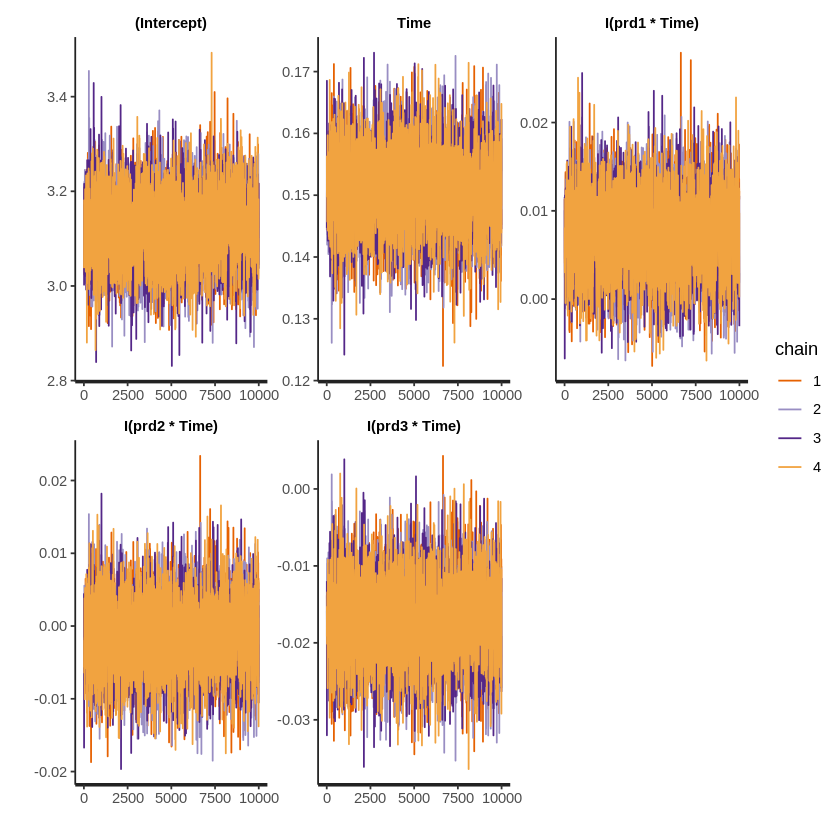

In [0]:
stan_trace(glm_post1)

The trace plots suggest stability and do not show any signs of non-convergence of the model.

Warning message:
“Ignoring unknown parameters: fun.y”
No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`



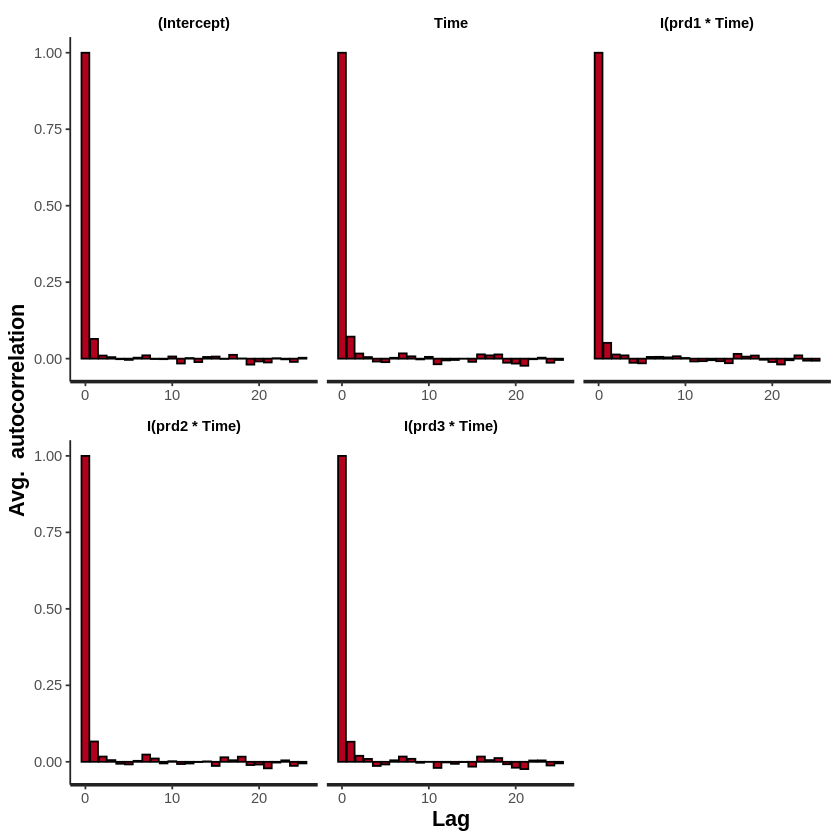

In [0]:
stan_ac(glm_post1)

The above ACF plots show no correlation between the samples. Note that this happened by introducing thinning. Thinning will imply the number of iterations to count on before storing a sample.

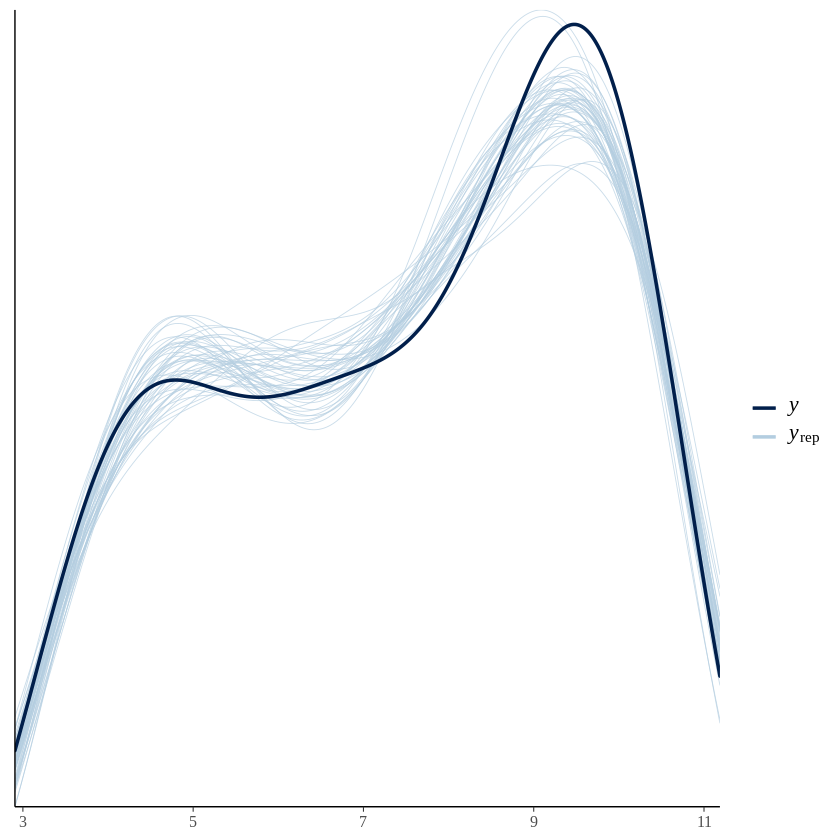

In [0]:
pp_check(glm_post1)

The posterior predictive checking plot above also suggests the model to be a good fit. It compared observed data to simulated data from the posterior predictive distribution. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



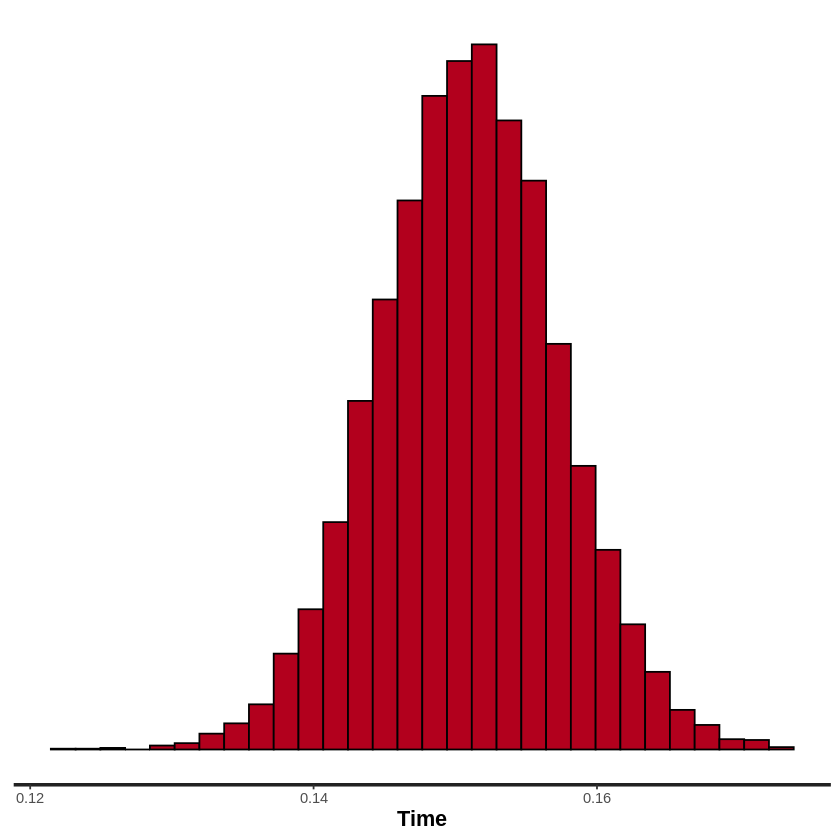

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



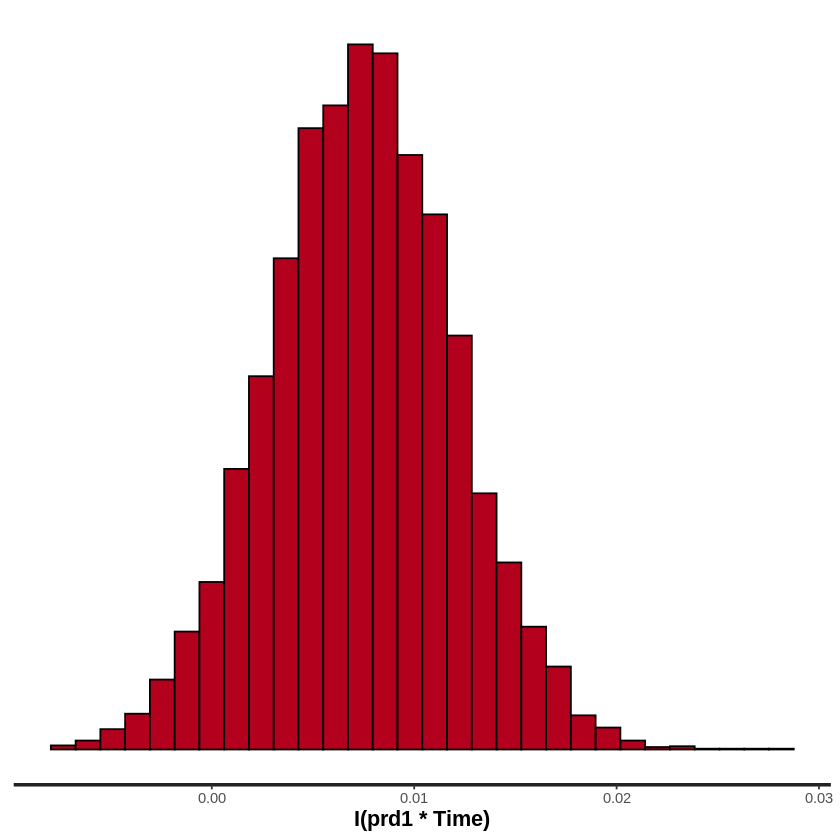

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



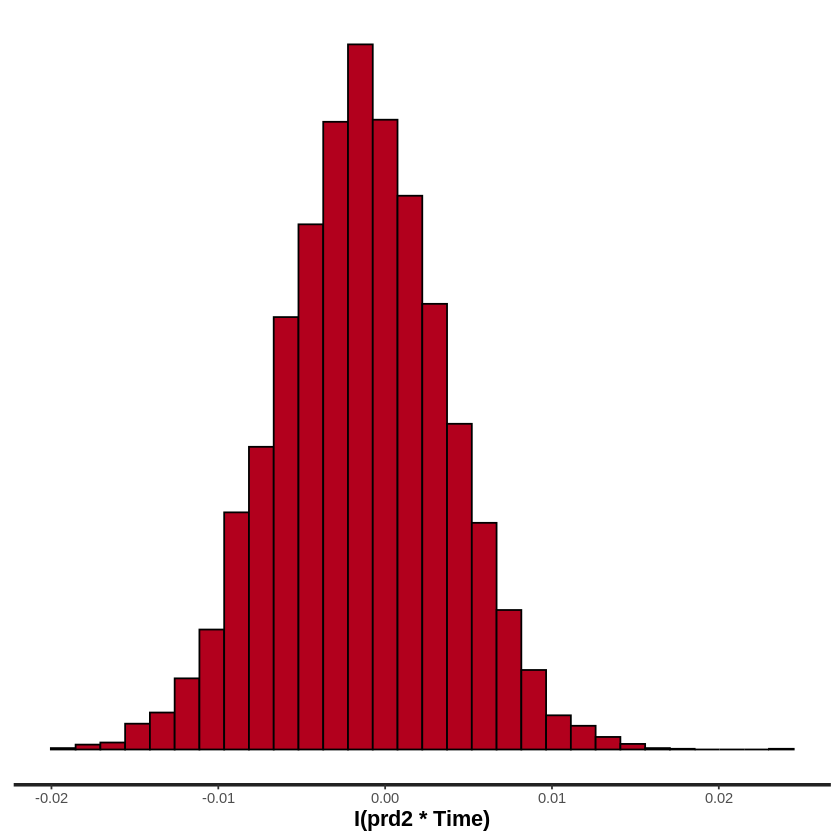

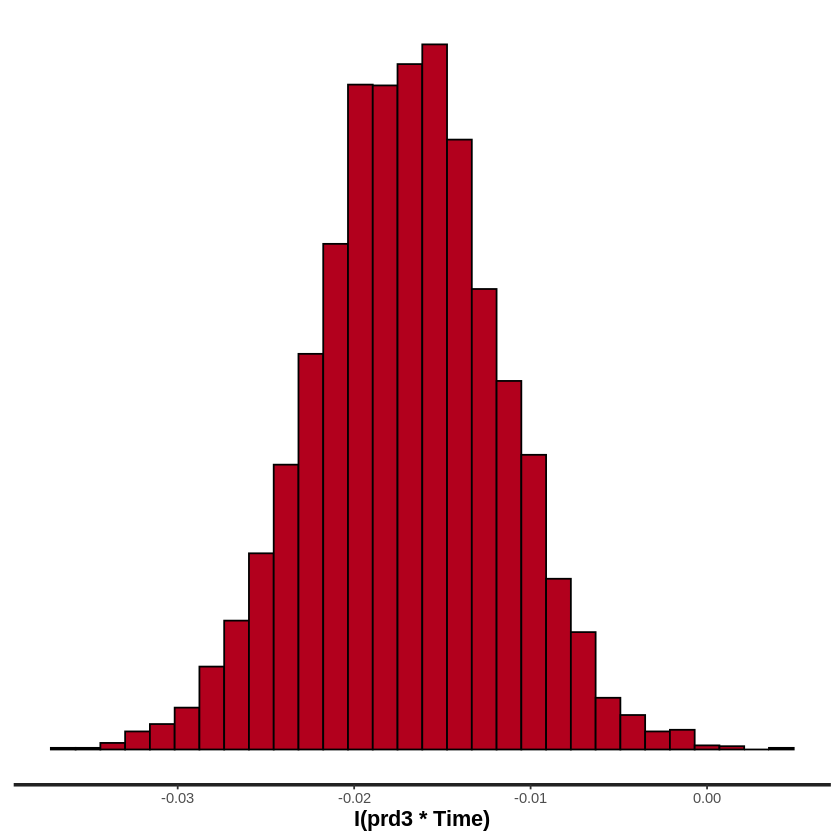

In [0]:
stan_hist(glm_post1, pars=c("Time"))
stan_hist(glm_post1, pars=c("I(prd1 * Time)"))
stan_hist(glm_post1, pars=c("I(prd2 * Time)"))
stan_hist(glm_post1, pars=c("I(prd3 * Time)"))

The histograms above give us an idea of the distribution of coefficient values.

In [0]:
prior_summary(glm_post1)


Priors for model 'glm_post1' 
------
Intercept (after predictors centered)
  Specified prior:
    ~ normal(location = 0, scale = 10)
  Adjusted prior:
    ~ normal(location = 0, scale = 23)

Coefficients
  Specified prior:
    ~ normal(location = [0,0,0,...], scale = [2.5,2.5,2.5,...])
  Adjusted prior:
    ~ normal(location = [0,0,0,...], scale = [0.35,0.48,0.32,...])

Auxiliary (sigma)
  Specified prior:
    ~ exponential(rate = 1)
  Adjusted prior:
    ~ exponential(rate = 0.43)
------
See help('prior_summary.stanreg') for more details

We can take a look at default priors above. The intercept and coefficients both use a normal distribution centered around 0 as a prior, but the distribution for the intercept has higher variance (scale). The error term uses an exponential distribution as a prior.


Drawing from prior...



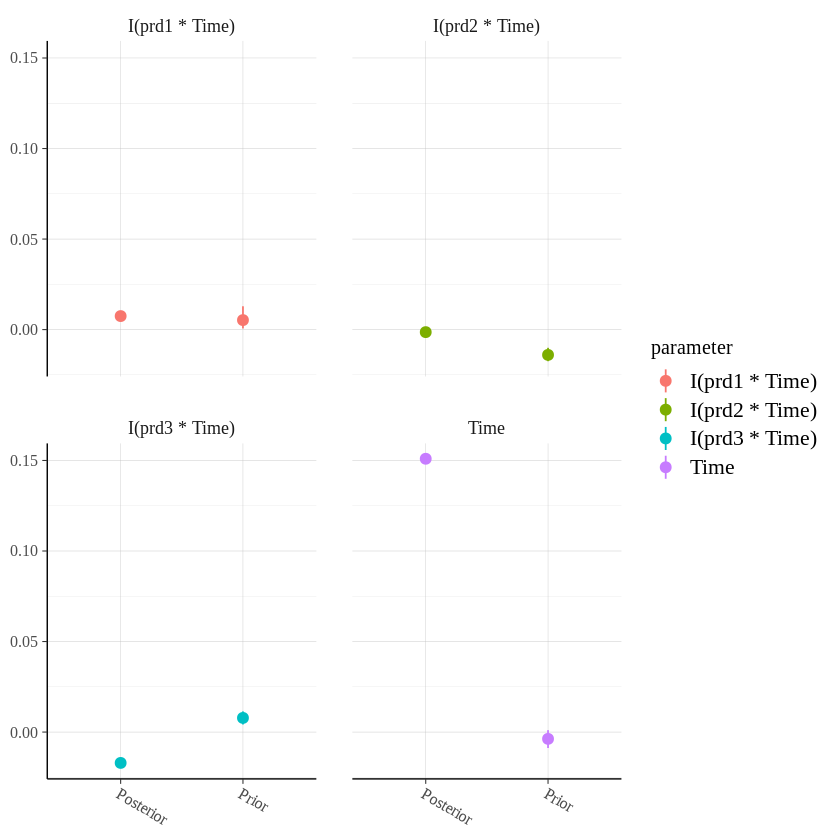

In [0]:
posterior_vs_prior(glm_post1, group_by_parameter = TRUE,prob=0.01, pars=c("Intercept","Time","I(prd1 * Time)","I(prd2 * Time)","I(prd3 * Time)"))

Intervals from the prior distribution and the posterior distribution above show how the observed data has changed the parameter estimates.

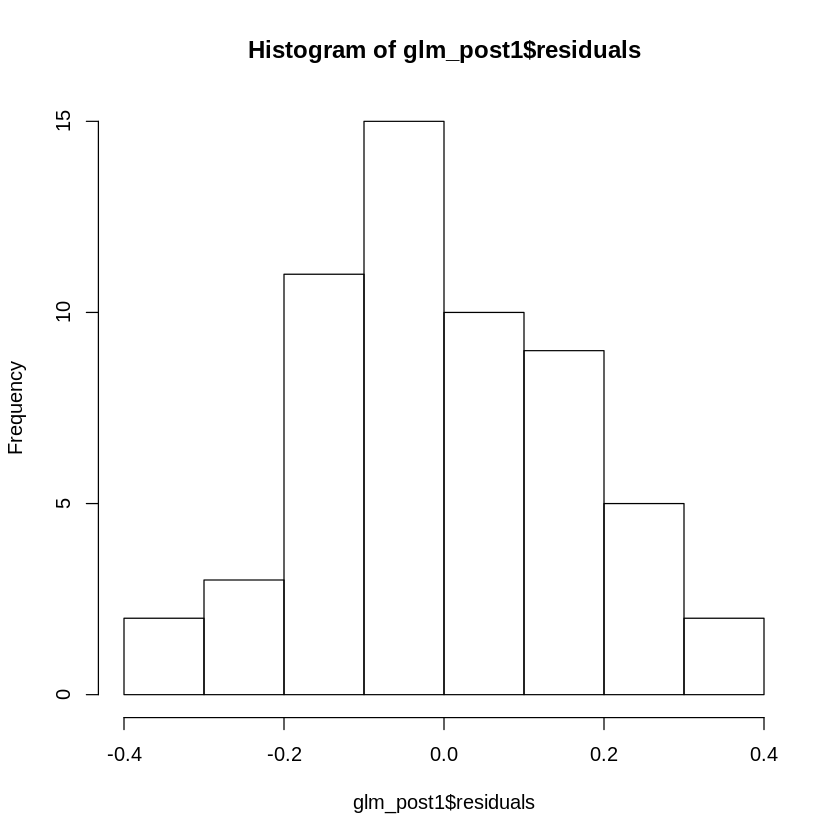

In [0]:
hist(glm_post1$residuals)


The residuals seem to follow normality as suggested by the histogram

In [0]:
shapiro.test(glm_post1$residuals)


	Shapiro-Wilk normality test

data:  glm_post1$residuals
W = 0.98797, p-value = 0.8418


The residuals indeed follow normality as the p-value is not less than 0.05 so we fail to reject the null hypothesis of non normality.

**Results**

In [0]:
round(posterior_interval(glm_post1, prob = 0.90, pars=c("(Intercept)","Time","I(prd1 * Time)","I(prd2 * Time)","I(prd3 * Time)")),6)
#90%CI

5%        95%      
(Intercept)     2.999772  3.246828
Time            0.140503  0.161409
I(prd1 * Time) -0.000061  0.015077
I(prd2 * Time) -0.009578  0.006859
I(prd3 * Time) -0.025800 -0.008396

The 90% CI for prd3*Time doesn't overlap 0 suggesting it to be statistically significant.

In [0]:
round(posterior_interval(glm_post1, prob = 0.95, pars=c("(Intercept)","Time","I(prd1 * Time)","I(prd2 * Time)","I(prd3 * Time)")),6)
#95%CI

2.5%      97.5%    
(Intercept)     2.976727  3.268565
Time            0.138418  0.163471
I(prd1 * Time) -0.001452  0.016492
I(prd2 * Time) -0.011273  0.008438
I(prd3 * Time) -0.027515 -0.006836

We mainly need to decide what results we want to conclude - whether there is an effect in the "percentage change" of cases, or whether there is an effect in the "number" of cases. 

But going by any of the ways above, we can conclude that the lock down was indeed effective in India. As the CI for prd3\*Time don't overlap with 0, it shows a significant effect on the log(Total_Confirmed_Cases).So, maybe the lockdown wasn't that much effective in the beginning, but soon started to be much more effective after around a period of 28 days.





---



---



In [0]:
### Task 2

### Italy lockdown started on March 09,2020
### Spanish lockdown phase I - 13-27 March, 2020
### Spanish lockdown phase II - 28 -12 April, 2020

### Consider the Italy and Spanish data and check if lockdown works.

#**Analysis for Italy**

In [0]:
Italy_data<-data[data$Country.Region=='Italy',]

dats=as.Date(names(Italy_data[-c(1:4)]), format = "X%m.%d.%y")

Italy_data1<-cbind.data.frame(Date=dats,Cases=t(Italy_data[-c(1:4)]))
Italy_incid<-diff(Italy_data1$`138`)
n<-length(Italy_incid)  

Italy_data2<-cbind.data.frame(Dates=dats[2:length(dats)],Italy_incid=Italy_incid,Cases=Italy_data1$`138`[2:(n+1)])
colnames(Italy_data2)<-c("Dates","Incidence","Total_Confirmed_Cases")

#This case has been chosen in the similar way as we did for India
#i.e. the date after which the cases started to grow consistently
Italy_data2<-subset(Italy_data2,Dates>="2020-02-24")
rownames(Italy_data2)=1:nrow(Italy_data2)

Italy_data2$Time<-1:nrow(Italy_data2)
Italy_data2$Time2=Italy_data2$Time^2

Italy_data2$lock_down<-0
Italy_data2$lock_down[Italy_data2$Dates>="2020-03-09"]<-1

In [0]:
print(Italy_data2)

        Dates Incidence Total_Confirmed_Cases Time Time2 lock_down
1  2020-02-24        74                   229    1     1         0
2  2020-02-25        93                   322    2     4         0
3  2020-02-26       131                   453    3     9         0
4  2020-02-27       202                   655    4    16         0
5  2020-02-28       233                   888    5    25         0
6  2020-02-29       240                  1128    6    36         0
7  2020-03-01       566                  1694    7    49         0
8  2020-03-02       342                  2036    8    64         0
9  2020-03-03       466                  2502    9    81         0
10 2020-03-04       587                  3089   10   100         0
11 2020-03-05       769                  3858   11   121         0
12 2020-03-06       778                  4636   12   144         0
13 2020-03-07      1247                  5883   13   169         0
14 2020-03-08      1492                  7375   14   196      

There seems to be one outlier value of 0 incidence corresponding to the date 2020/03/12. To adjust for that we'll take half of the detected cases from the next day. This might be because the lockdown was activated that time. Maybe there was some delay in reporting those cases.

In [0]:
Italy_data2[18,2]=Italy_data2[19,2]/2
Italy_data2[18,3]=Italy_data2[17,3]+Italy_data2[18,2]
Italy_data2[19,2]=Italy_data2[19,2]/2

In [0]:
Italy_data2$ln_rt[2:nrow(Italy_data2)]<-diff(log(Italy_data2$Total_Confirmed_Cases))

Fitting a simple OLS model below for ln_rt values

In [0]:
fit<-lm(ln_rt~Time+I(Time^2)+lock_down
        ,data=Italy_data2) 
summary(fit)
shapiro.test(fit$residuals)


Call:
lm(formula = ln_rt ~ Time + I(Time^2) + lock_down, data = Italy_data2)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.090269 -0.008165  0.002513  0.008629  0.130272 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.584e-01  1.208e-02  29.681  < 2e-16 ***
Time        -1.249e-02  1.294e-03  -9.656 4.82e-14 ***
I(Time^2)    1.105e-04  1.547e-05   7.140 1.14e-09 ***
lock_down    4.665e-03  1.796e-02   0.260    0.796    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02834 on 63 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.9266,	Adjusted R-squared:  0.9231 
F-statistic:   265 on 3 and 63 DF,  p-value: < 2.2e-16



	Shapiro-Wilk normality test

data:  fit$residuals
W = 0.80155, p-value = 4.354e-08


Lock down is not effective according to the GLM and also the p-values shows non normality for the residuals suggesting the model to be not that good.

Now testing if errors follow Laplace.

In [0]:
## density of Laplace distribution 
dlaplace<-function(x,mu,lambda){
  return(exp(-abs(x-mu)/lambda)/(2*lambda))
}
## The negative log-likelihood function
neg_log_likelihood<-function(data,para){
  mu<-para[1]
  lambda<-(para[2])
  f<-dlaplace(x=data
              ,mu=mu
              ,lambda=lambda)
  return(-sum(log(f))) 
}

## initial parameters
para.init<-c(0,1)

## residual or idiosyncratic return 
## from capm_portf
e<-summary(fit)$residual

mle<-optim(para.init
           ,neg_log_likelihood
           ,data=e)

#mle$par
## The following function simulate from 
## the fitted Laplace distribution
rlaplace<-function(n,mu,lmbda){
  # n : sample size
  # mu: location parameter
  # lambda : scale parameter
  u<-runif(n,-0.5,0.5)
  sgn<-rep(NA,n)
  for(i in 1:n){
    if(u[i]<0) sgn[i]<--1
    if(u[i]>0) sgn[i]<-1
    if(u[i]==0) sgn[i]<-0
  }
  r<-mu-lmbda*sgn*log(1-2*abs(u))
  return(r)
}

## simulate the result
set.seed(4000)
r.sim<-rlaplace(n=1000
                ,mu=mle$par[1]
                ,lmbda=mle$par[2])

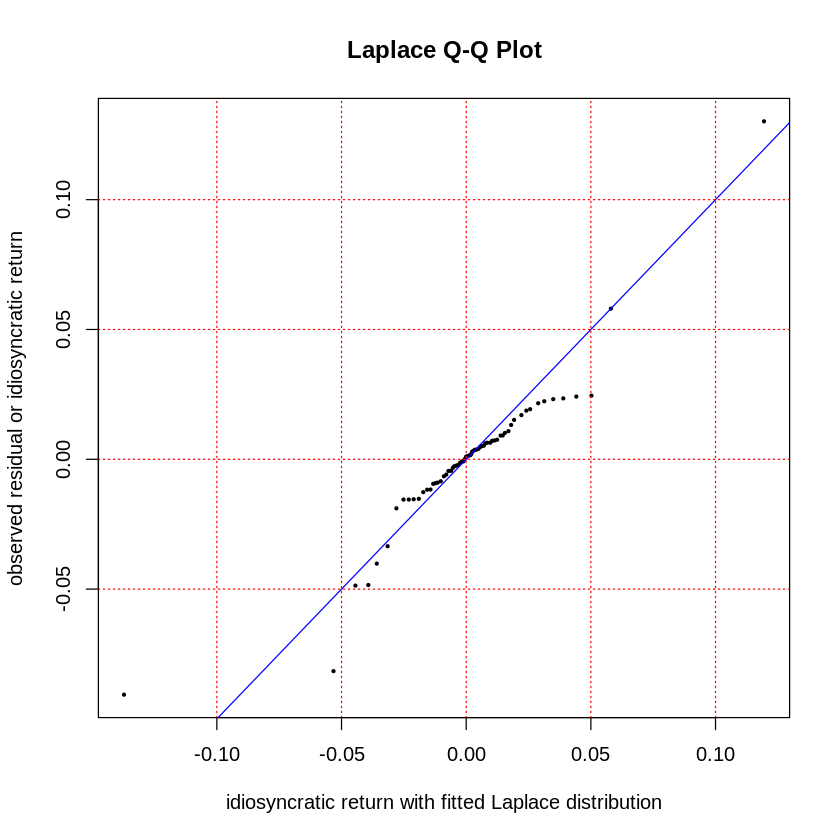

In [0]:
qqplot(r.sim,e
       ,cex=0.5
       ,pch=20
       ,xlab="idiosyncratic return with fitted Laplace distribution"
       ,ylab="observed residual or idiosyncratic return"
       ,main="Laplace Q-Q Plot")

abline(a=0,b=1,col="blue")
grid(col="red")

Instead of the above, we can also use a package lawstat and the function laplace.test to test for residuals following laplace. We will find that they do follow laplace.

In [0]:
install.packages("lawstat")
library("lawstat")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bibtex’, ‘gbRd’, ‘Kendall’, ‘mvtnorm’, ‘Rdpack’




In [0]:
laplace.test(fit$residuals)$D

[1] 0.9240645

In the above laplace test we have

H0: The residuals follow laplace

As the p-value obtained above is > 0.05 we do not reject H0. So the residuals in this model follow Laplace.


Performining Bayesian regression analysis using stan below for the residuals following Laplace case.

In [0]:
Italy_data3=na.omit(Italy_data2) #Removing NA values 

In [0]:
fit<-recipe(ln_rt~Time+Time2+lock_down,data=Italy_data3)%>%
  prep(data = Italy_data3, retain = TRUE) 

X=juice(fit, all_predictors(), composition = "matrix")
new_X=X
y=drop(juice(fit, all_outcomes(), composition = "matrix"))
N=length(Italy_data3$ln_rt)
K=ncol(X)

In [0]:
write("// Stan model for simple linear regression
// Linear Model with Laplace(Double Exponential) Errors
data {
  // number of observations
  int N;
  // response
  vector[N] y;
  // number of columns in the design matrix X
  int K;
  // design matrix X
  // should not include an intercept
  matrix [N, K] X;
  
}
parameters {
  // regression coefficient vector
  real alpha;
  vector[K] beta;
  real < lower = 0 > sigma;
}
model {
  alpha ~ cauchy(0,1);
  beta ~ cauchy(0,1);
  sigma ~ gamma(1,1);
  y ~ double_exponential(alpha + X * beta, sigma);
}
generated quantities {
  real y_rep[N];  
  
  for (n in 1:N) {
  y_rep[n] =double_exponential_rng(alpha + X[n] * beta, sigma);
  }
}
// The posterior predictive distribution",

"stan_model2.stan")

stan_data=list(N = N, K= K, X = X, new_X=new_X, y = y)
#stanc("stan_model2.stan")
stan_model2="stan_model2.stan"
fit=stan(file = stan_model2, data = stan_data, warmup = 10000, iter = 20000, chains = 4, cores = 2, thin = 10, control = list(max_treedepth = 15))

So now we have the model ln_rt~Time+Time2+lock_down trained using Bayesian analysis and assuming the residuals follow Laplace.

In [0]:
summary(as.matrix(fit)[,1:5])

     alpha           beta[1]             beta[2]             beta[3]         
 Min.   :0.3124   Min.   :-0.015898   Min.   :7.442e-05   Min.   :-0.055077  
 1st Qu.:0.3525   1st Qu.:-0.013325   1st Qu.:1.024e-04   1st Qu.:-0.006075  
 Median :0.3604   Median :-0.012541   Median :1.109e-04   Median : 0.007397  
 Mean   :0.3589   Mean   :-0.012550   Mean   :1.110e-04   Mean   : 0.007143  
 3rd Qu.:0.3666   3rd Qu.:-0.011797   3rd Qu.:1.195e-04   3rd Qu.: 0.020416  
 Max.   :0.3920   Max.   :-0.009244   Max.   :1.512e-04   Max.   : 0.061305  
     sigma        
 Min.   :0.01133  
 1st Qu.:0.01553  
 Median :0.01688  
 Mean   :0.01708  
 3rd Qu.:0.01843  
 Max.   :0.02643  

In the above summary, alpha, beta1, beta2, beta3 are the coefficient values corresponding to the Intercept, Time, Time2, and lock_down respectively.

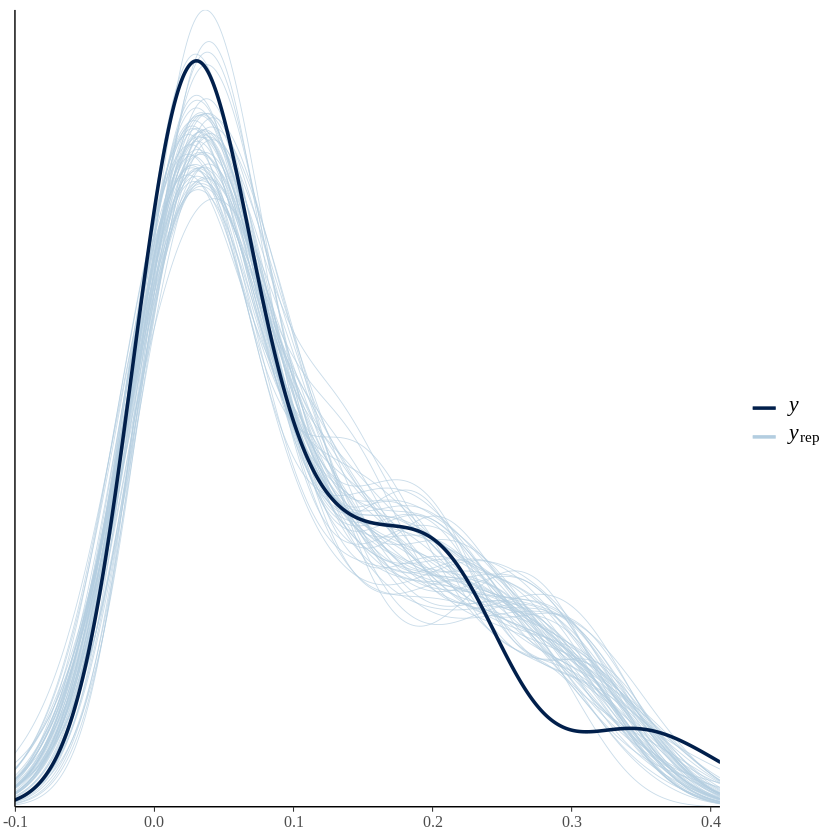

In [0]:
y_rep <- as.matrix(fit, pars = "y_rep")
ppc_dens_overlay(y, y_rep[1:56, ])

The above posterior predictive check graph suggests the model to be a good fit.

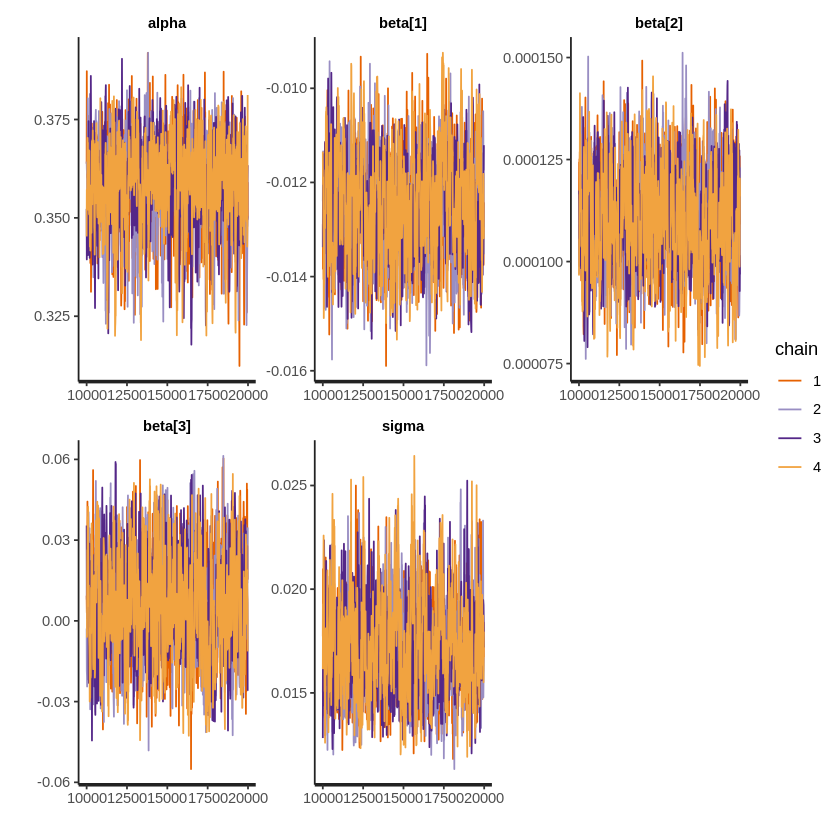

In [0]:
stan_trace(fit,pars=c("alpha","beta","sigma"))

The traceplots above show stability in the chains

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



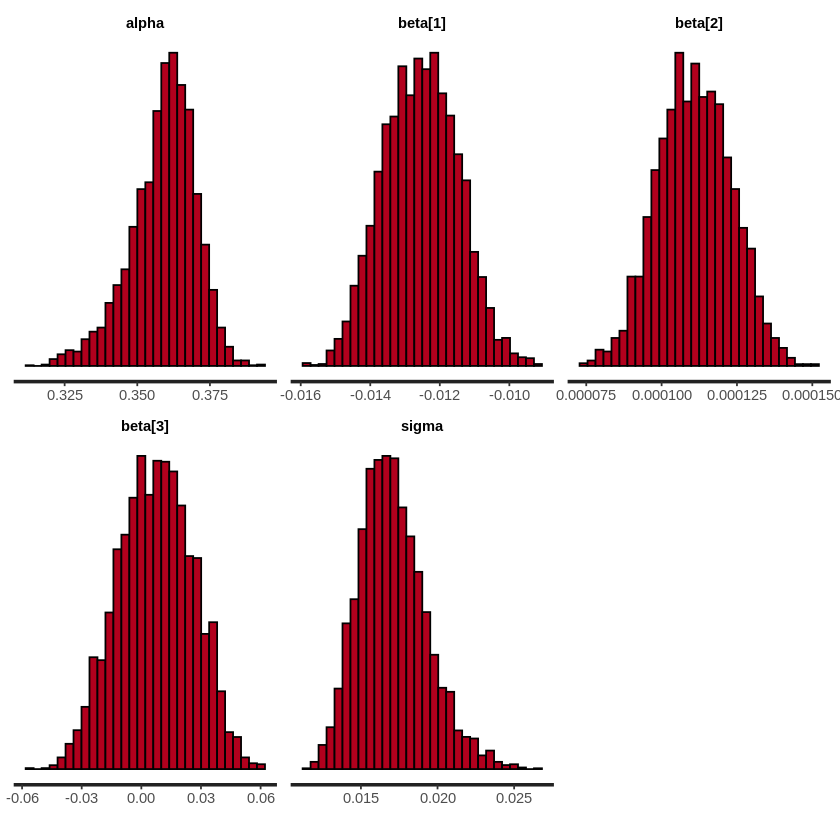

In [0]:
stan_hist(fit,pars=c("alpha","beta","sigma"))

Histograms above for the distibution of various coefficient values and sigma corresponding to the error

In [0]:
posterior <- extract(fit)
#Prob that lock_down < 0
sum(posterior$beta[,3]<0)/length(posterior$beta[,3])

[1] 0.36525

Probability of lock down's coefficient to be less than 0 is very less! This will suggest that the ln_rt value will increase even when lock down is present.

In [0]:
#The 80, 85 and 90% CI for beta3 i.e. corresponding to lock_down
round(quantile(posterior$beta[,3], probs = c(.1, .9)) ,6)
round(quantile(posterior$beta[,3], probs = c(.075, .925)) ,6)
round(quantile(posterior$beta[,3], probs = c(.05, .95)) ,6)

10%       90% 
-0.017129  0.031795

7.5%     92.5% 
-0.020709  0.034641

5%       95% 
-0.024306  0.037552

As the CI includes 0, it implies non effectiveness.But rather than going with the above results, consider the work below, which should be more effective. If the total confirmed now is say 1000 and the increase is 500, then the ln_rt value will be proportional to (1500/1000) = 1.5 . But say the total confirmed cases now is 10000 and the increase is same 500, the ln_rt will be proportional to 1.05. This is a huge difference. It will be even less for 1 lakh i.e proportional to 1.005. So we should have a requirement of these type of results to proceed. I'll say we should rather consider the case below which should be better to conclude the effect of lockdown.

##**Main Analysis for Italy**

Now, as discussed in the case of India, we'll rather look into log of Total Confirmed Cases. And we'll also take into account the various 14 day phases we discussed.

In [0]:
#The various 14 days periods (phrases)
Italy_data2$prd1<-0
Italy_data2$prd2<-0
Italy_data2$prd3<-0
Italy_data2$prd4<-0
Italy_data2$prd1[Italy_data2$Dates>="2020-03-09" & Italy_data2$Dates<="2020-03-22"]<-1
Italy_data2$prd2[Italy_data2$Dates>="2020-03-23" & Italy_data2$Dates<="2020-04-05"]<-1
Italy_data2$prd3[Italy_data2$Dates>="2020-04-06" & Italy_data2$Dates<="2020-04-19"]<-1
Italy_data2$prd4[Italy_data2$Dates>="2020-04-20"]<-1

Note the change in the model below.

In [0]:
fit<-lm(log(Total_Confirmed_Cases)~Time+I(prd1*Time)+I(prd2*Time)
        +I(prd3*Time)+I(prd4*Time),data=Italy_data2)
#Note that rather than just taking the periods, I've rather taken their product with time.
#This is because the effect of lockdown in a period won't be the same throughout the period.
#This can also be done with ln_rt
summary(fit)
shapiro.test(fit$residuals)


Call:
lm(formula = log(Total_Confirmed_Cases) ~ Time + I(prd1 * Time) + 
    I(prd2 * Time) + I(prd3 * Time) + I(prd4 * Time), data = Italy_data2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.70788 -0.23039  0.04857  0.21090  0.65660 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     5.93726    0.17317  34.286  < 2e-16 ***
Time            0.20433    0.02089   9.780 4.14e-14 ***
I(prd1 * Time) -0.01173    0.01536  -0.764   0.4480    
I(prd2 * Time) -0.04980    0.01714  -2.906   0.0051 ** 
I(prd3 * Time) -0.08339    0.01810  -4.608 2.12e-05 ***
I(prd4 * Time) -0.10392    0.01863  -5.577 5.92e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3425 on 61 degrees of freedom
Multiple R-squared:  0.9698,	Adjusted R-squared:  0.9673 
F-statistic: 391.2 on 5 and 61 DF,  p-value: < 2.2e-16



	Shapiro-Wilk normality test

data:  fit$residuals
W = 0.98593, p-value = 0.6513


According to the above OLS method, in Italy the third and fourth periods were the most effective. The second period was also effective according to the above model.

Also the errors follow normality.

Doing a bayesian analysis using rstanarm below.

**Bayesian Regression**

In [0]:
glm_post1 <- stan_glm(log(Total_Confirmed_Cases)~Time+I(prd1*Time)+I(prd2*Time)+I(prd3*Time)+I(prd4*Time)
                      ,data=Italy_data2, family=gaussian, iter=20000, thin =10)

In [0]:
summary(glm_post1)


Model Info:
 function:     stan_glm
 family:       gaussian [identity]
 formula:      log(Total_Confirmed_Cases) ~ Time + I(prd1 * Time) + I(prd2 * 
	   Time) + I(prd3 * Time) + I(prd4 * Time)
 algorithm:    sampling
 sample:       4000 (posterior sample size)
 priors:       see help('prior_summary')
 observations: 67
 predictors:   6

Estimates:
                 mean   sd   10%   50%   90%
(Intercept)     6.0    0.2  5.7   6.0   6.2 
Time            0.2    0.0  0.2   0.2   0.2 
I(prd1 * Time)  0.0    0.0  0.0   0.0   0.0 
I(prd2 * Time)  0.0    0.0 -0.1   0.0   0.0 
I(prd3 * Time) -0.1    0.0 -0.1  -0.1  -0.1 
I(prd4 * Time) -0.1    0.0 -0.1  -0.1  -0.1 
sigma           0.3    0.0  0.3   0.3   0.4 

Fit Diagnostics:
           mean   sd   10%   50%   90%
mean_PPD 10.5    0.1 10.5  10.5  10.6 

The mean_ppd is the sample average posterior predictive distribution of the outcome variable (for details see help('summary.stanreg')).

MCMC diagnostics
               mcse Rhat n_eff
(Interce

R hat values above are all 1.0 indicating the sampler to be effective.

In [0]:
round(glm_post1$coefficients,6)

(Intercept)           Time I(prd1 * Time) I(prd2 * Time) I(prd3 * Time) 
      5.966180       0.200335      -0.008573      -0.046560      -0.079861 
I(prd4 * Time) 
     -0.100516

These are the coefficient centered values corresponding to the various variables.

**Convergence Diagnostics and Model Fit**

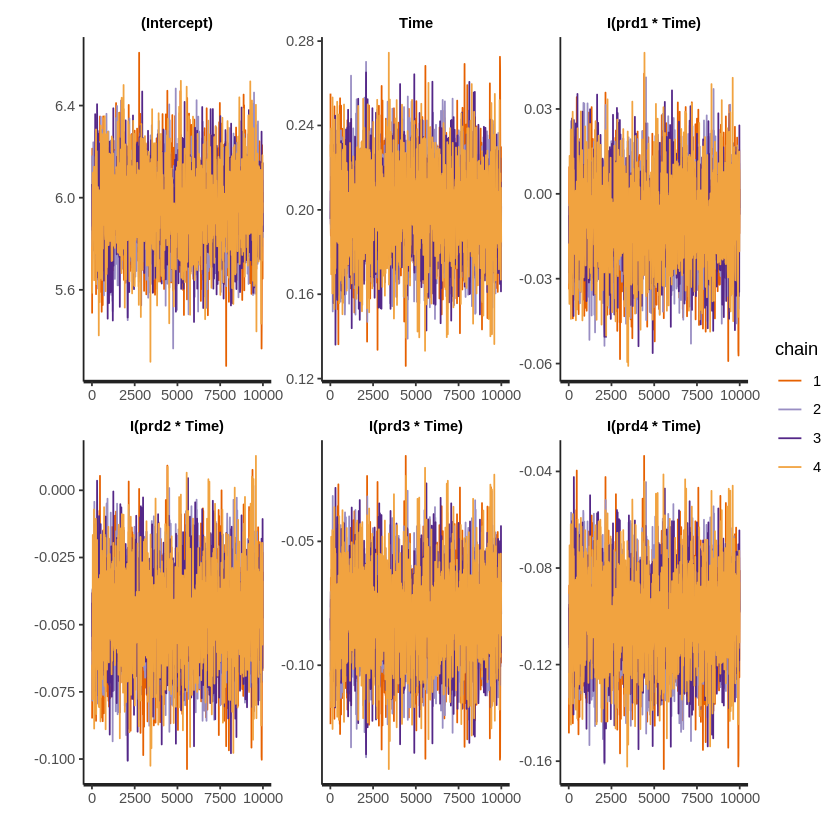

In [0]:
stan_trace(glm_post1)

Traceplots suggest stability of the chains

Warning message:
“Ignoring unknown parameters: fun.y”
No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`



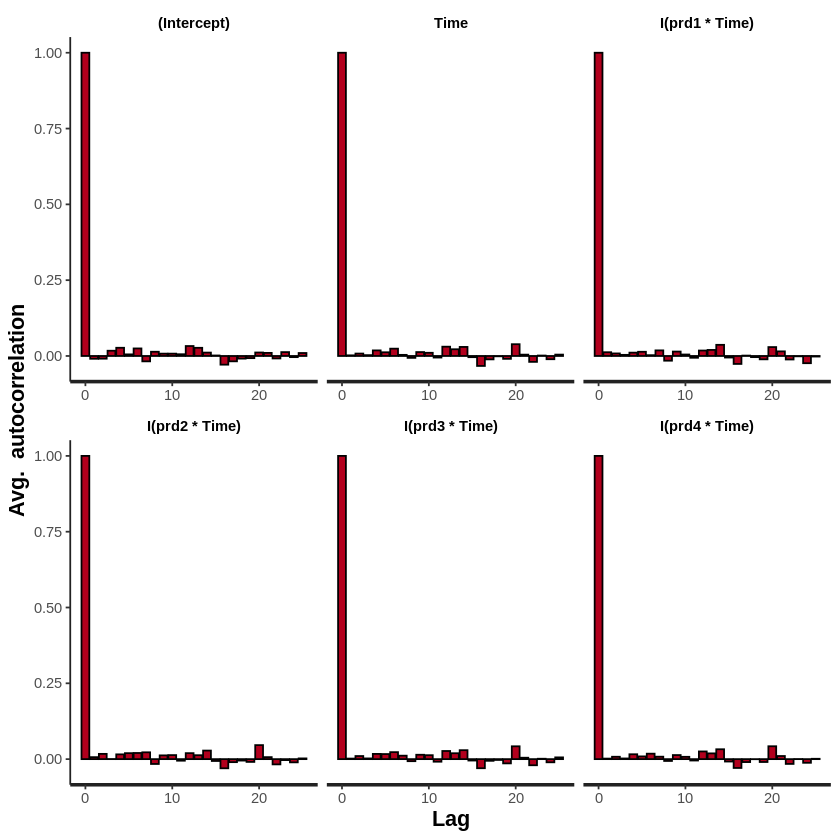

In [0]:
stan_ac(glm_post1)

ACF plots show no correlation between the samples

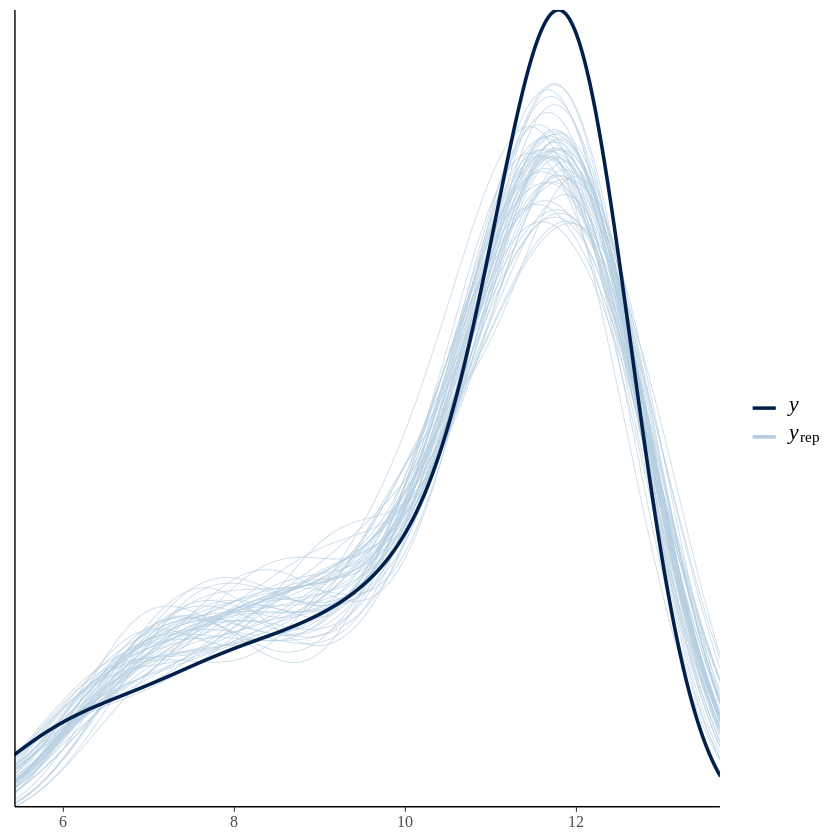

In [0]:
pp_check(glm_post1)


The posterior predictive check graph above and all the other checks suggest the model to be a good fit.

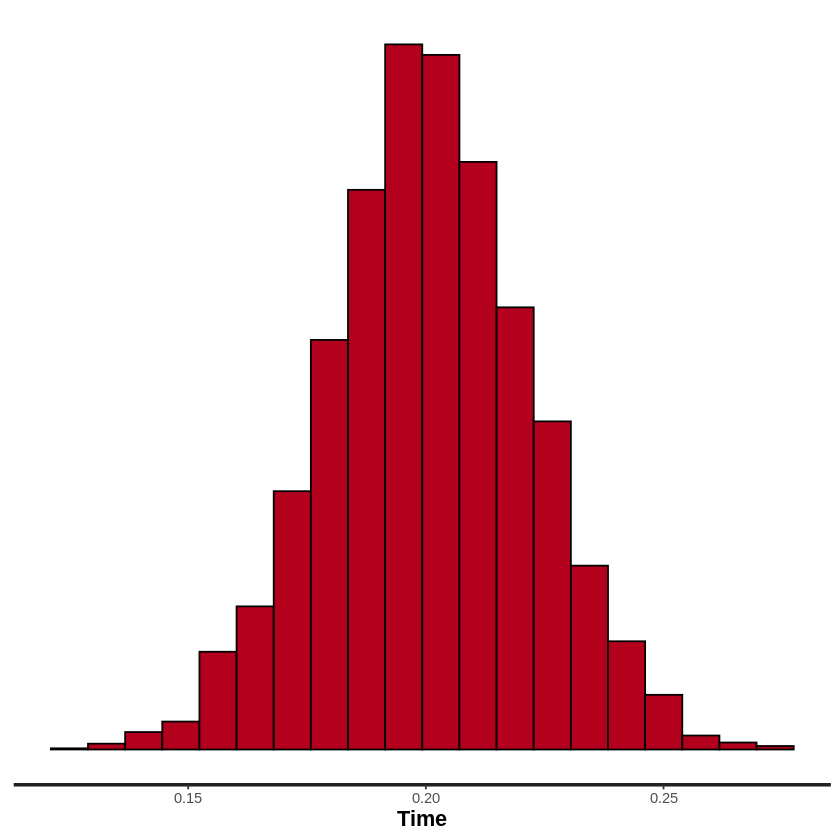

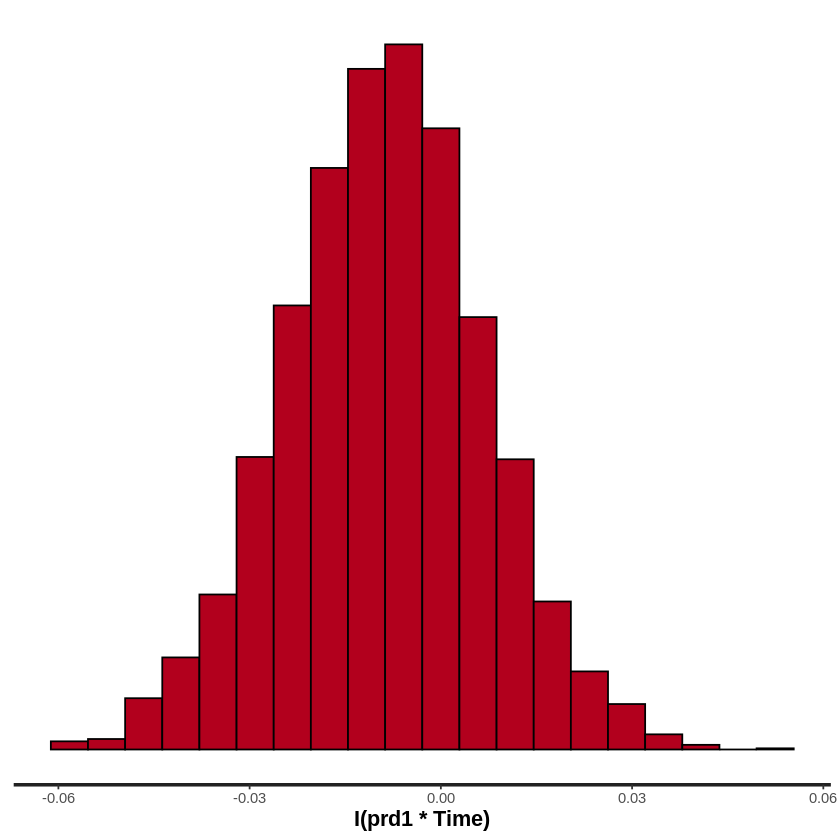

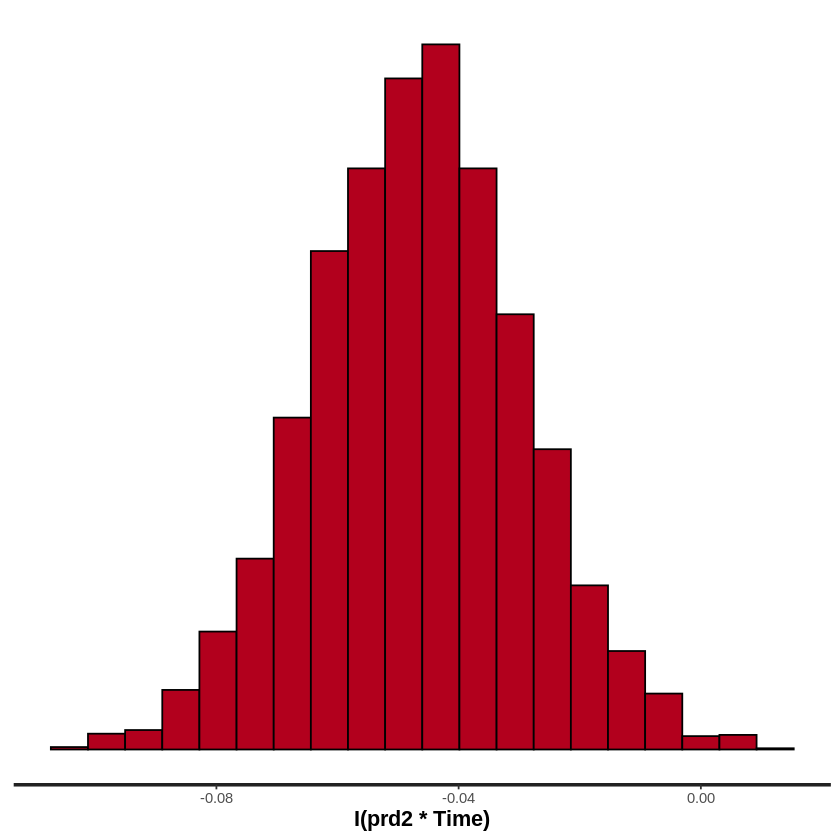

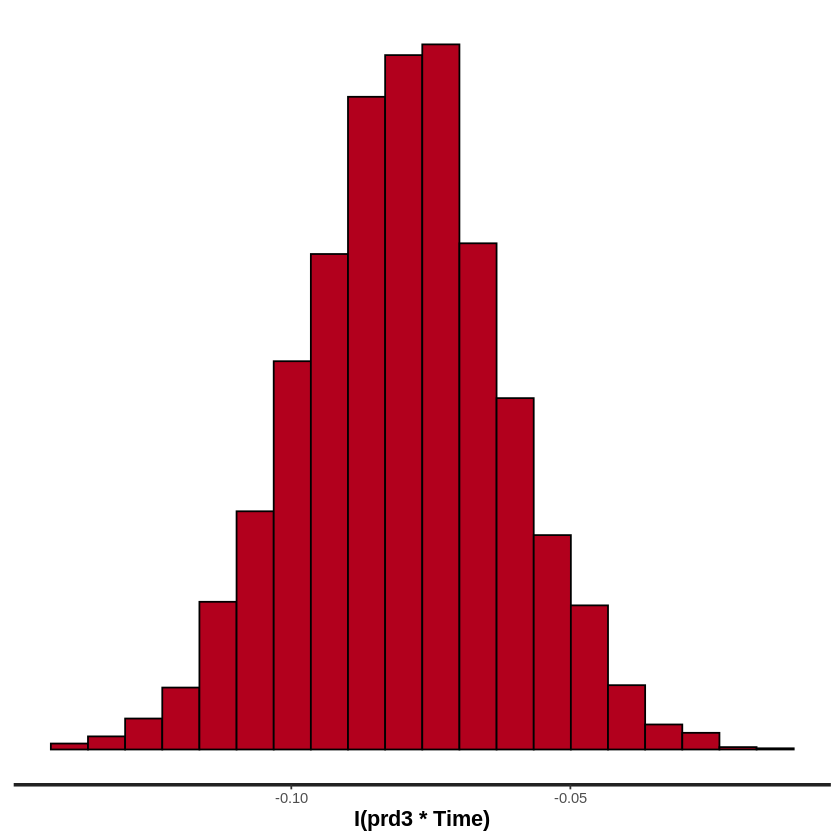

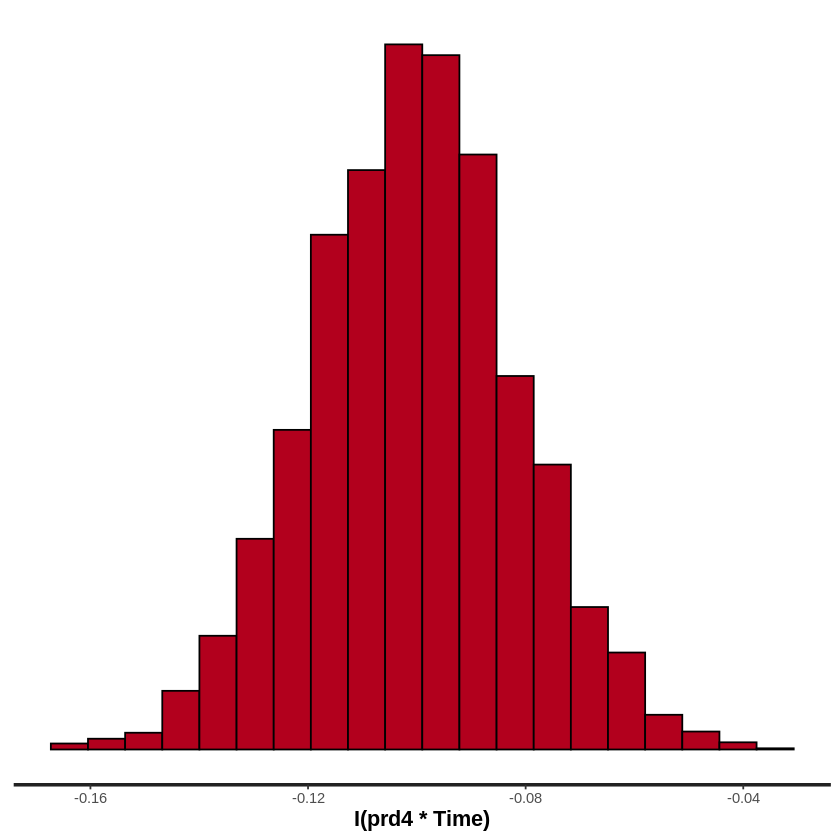

In [0]:
stan_hist(glm_post1, pars=c("Time"),bins=20)
stan_hist(glm_post1, pars=c("I(prd1 * Time)"),bins=20)
stan_hist(glm_post1, pars=c("I(prd2 * Time)"),bins=20)
stan_hist(glm_post1, pars=c("I(prd3 * Time)"),bins=20)
stan_hist(glm_post1, pars=c("I(prd4 * Time)"),bins=20)

Obtaining histograms above to get an idea of distibution of the coefficient values.

In [0]:
prior_summary(glm_post1)


Priors for model 'glm_post1' 
------
Intercept (after predictors centered)
  Specified prior:
    ~ normal(location = 0, scale = 10)
  Adjusted prior:
    ~ normal(location = 0, scale = 19)

Coefficients
  Specified prior:
    ~ normal(location = [0,0,0,...], scale = [2.5,2.5,2.5,...])
  Adjusted prior:
    ~ normal(location = [0,0,0,...], scale = [0.24,0.53,0.32,...])

Auxiliary (sigma)
  Specified prior:
    ~ exponential(rate = 1)
  Adjusted prior:
    ~ exponential(rate = 0.53)
------
See help('prior_summary.stanreg') for more details

We can take a look at default priors above. The intercept and coefficients both use a normal distribution centered around 0 as a prior, but the distribution for the intercept has higher variance (scale). The error term uses an exponential distribution as a prior.


Drawing from prior...



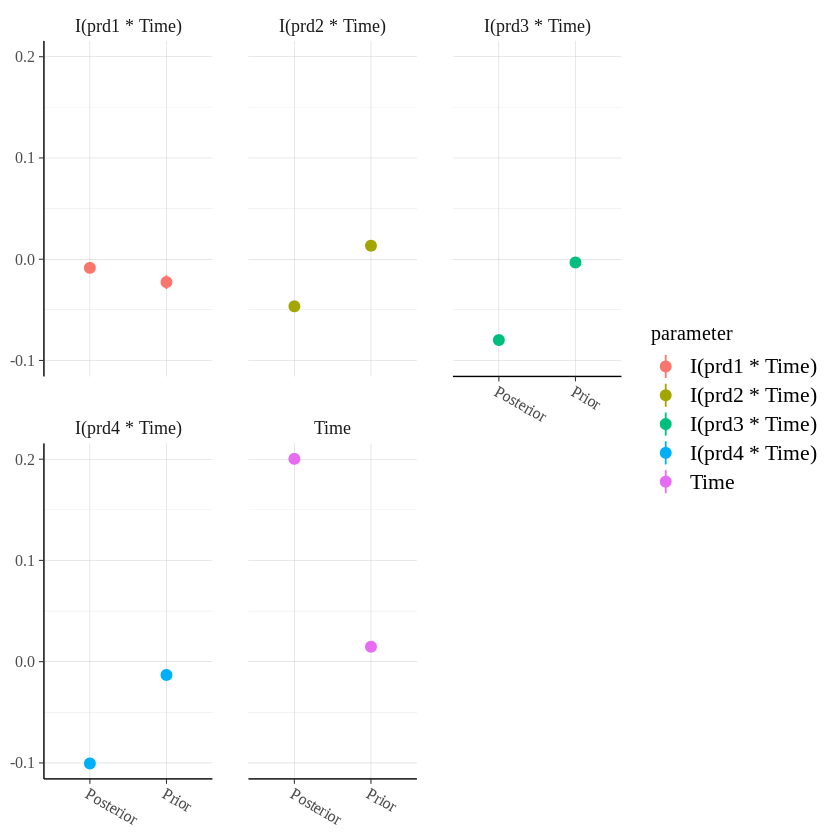

In [0]:
posterior_vs_prior(glm_post1, group_by_parameter = TRUE,prob=0.01, pars=c("Time","I(prd1 * Time)","I(prd2 * Time)","I(prd3 * Time)","I(prd4 * Time)"))

Intervals from the prior distribution and the posterior distribution above show how the observed data has changed the parameter estimates.

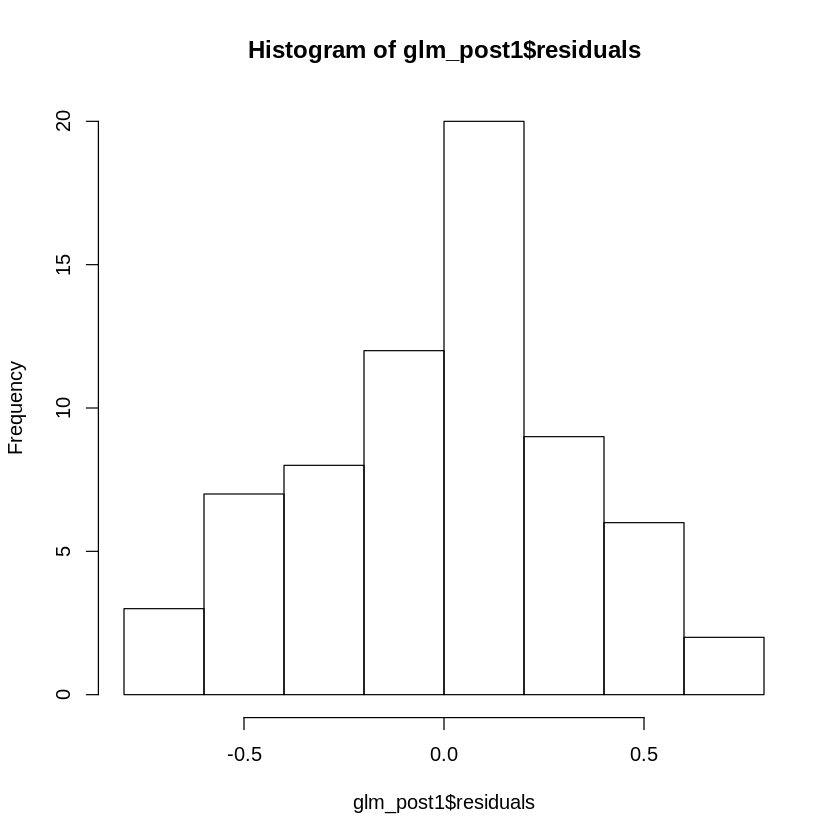

In [0]:
hist(glm_post1$residuals)


Residuals follow normality as seen from the histogram above and the Shapiro Wilk test below

In [0]:
shapiro.test(glm_post1$residuals)


	Shapiro-Wilk normality test

data:  glm_post1$residuals
W = 0.98535, p-value = 0.6183


**Results**

In [0]:
round(posterior_interval(glm_post1, prob = 0.90, pars=c("(Intercept)","Time","I(prd1 * Time)","I(prd2 * Time)","I(prd3 * Time)","I(prd4 * Time)")),6)
#90%CI

5%        95%      
(Intercept)     5.668646  6.246560
Time            0.165172  0.235521
I(prd1 * Time) -0.034539  0.016389
I(prd2 * Time) -0.075801 -0.017453
I(prd3 * Time) -0.110845 -0.049284
I(prd4 * Time) -0.131618 -0.068753

In [0]:
round(posterior_interval(glm_post1, prob = 0.95, pars=c("(Intercept)","Time","I(prd1 * Time)","I(prd2 * Time)","I(prd3 * Time)","I(prd4 * Time)")),6)
#95%CI

2.5%      97.5%    
(Intercept)     5.609262  6.301602
Time            0.158185  0.242459
I(prd1 * Time) -0.040717  0.022164
I(prd2 * Time) -0.080648 -0.012307
I(prd3 * Time) -0.116323 -0.043596
I(prd4 * Time) -0.137414 -0.062362

As the 90% or 95% CI for prd2\*Time, prd3\*Time and  prd4\*Time don't overlap with 0, they show a significant effect on the log(Total_Confirmed_Cases).

Thus after 14 days of being in effect, the lockdown started to decrease the COVID-19 cases in Italy.



---



---



#**Analysis for Spain**

In [0]:
#SPAIN DATA
### Spanish lockdown phase I - 13-27 March, 2020
### Spanish lockdown phase II - 28 -12 April, 2020

Spain_data<-data[data$Country.Region=='Spain',]

dats=as.Date(names(Spain_data[-c(1:4)]), format = "X%m.%d.%y")

Spain_data1<-cbind.data.frame(Date=dats,Cases=t(Spain_data[-c(1:4)]))
Spain_incid<-diff(Spain_data1$`202`)
n<-length(Spain_incid)  

Spain_data2<-cbind.data.frame(Dates=dats[2:length(dats)],Spain_incid=Spain_incid,Cases=Spain_data1$`202`[2:(n+1)])
colnames(Spain_data2)<-c("Dates","Incidence","Total_Confirmed_Cases")

Spain_data2<-subset(Spain_data2,Dates>="2020-02-25")
rownames(Spain_data2)=1:nrow(Spain_data2)

#Adjusting outlier value
Spain_data2[17,2]=round(Spain_data2[18,2]/2)-1
Spain_data2[17,3]=Spain_data2[16,3]+Spain_data2[17,2]
Spain_data2[18,2]=round(Spain_data2[18,2]/2)

#There is also a dip around 24th april. Negative cases. But lets leave that single value as it is
#Because I couldn't find out a proper reason why that happened
#So clueless of how to adjust for that

Spain_data2$Time<-1:nrow(Spain_data2)
Spain_data2$Time2=Spain_data2$Time^2

Spain_data2$lock_down<-0
Spain_data2$lock_down[Spain_data2$Dates>="2020-03-13" & Spain_data2$Dates<="2020-04-12"]<-1
#On 13 April, workers in some non-essential sectors, such as construction and industry, who cannot work remotely were allowed to return to work
#On 23 April, the state of alarm was extended until 9 May
Spain_data2$lock_down[Spain_data2$Dates>="2020-03-23"]<-1
Spain_data2$ln_rt[2:nrow(Spain_data2)]<-diff(log(Spain_data2$Total_Confirmed_Cases))

In [0]:
fit<-lm(ln_rt~Time+I(Time^2)+lock_down
        ,data=Spain_data2) 
summary(fit)
shapiro.test(fit$residuals)


Call:
lm(formula = ln_rt ~ Time + I(Time^2) + lock_down, data = Spain_data2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.34510 -0.02140 -0.00630  0.01589  0.28372 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.323e-01  4.321e-02   12.32  < 2e-16 ***
Time        -1.506e-02  4.430e-03   -3.40  0.00118 ** 
I(Time^2)    1.183e-04  5.232e-05    2.26  0.02731 *  
lock_down   -4.964e-02  5.912e-02   -0.84  0.40437    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09318 on 62 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.7477,	Adjusted R-squared:  0.7355 
F-statistic: 61.24 on 3 and 62 DF,  p-value: < 2.2e-16



	Shapiro-Wilk normality test

data:  fit$residuals
W = 0.83926, p-value = 5.75e-07


Above model shows lockdown to be reducing ln_rt but it is not statistically significant.

Also the errors dont follow Normality. So checking if they follow Laplace instead below.

In [0]:
## density of Laplace distribution 
dlaplace<-function(x,mu,lambda){
  return(exp(-abs(x-mu)/lambda)/(2*lambda))
}
## The negative log-likelihood function
neg_log_likelihood<-function(data,para){
  mu<-para[1]
  lambda<-(para[2])
  f<-dlaplace(x=data
              ,mu=mu
              ,lambda=lambda)
  return(-sum(log(f))) 
}

## initial parameters
para.init<-c(0,1)

## residual or idiosyncratic return 
## from capm_portf
e<-summary(fit)$residual

mle<-optim(para.init
           ,neg_log_likelihood
           ,data=e)

#mle$par
## The following function simulate from 
## the fitted Laplace distribution
rlaplace<-function(n,mu,lmbda){
  # n : sample size
  # mu: location parameter
  # lambda : scale parameter
  u<-runif(n,-0.5,0.5)
  sgn<-rep(NA,n)
  for(i in 1:n){
    if(u[i]<0) sgn[i]<--1
    if(u[i]>0) sgn[i]<-1
    if(u[i]==0) sgn[i]<-0
  }
  r<-mu-lmbda*sgn*log(1-2*abs(u))
  return(r)
}

## simulate the result
set.seed(4000)
r.sim<-rlaplace(n=1000
                ,mu=mle$par[1]
                ,lmbda=mle$par[2])

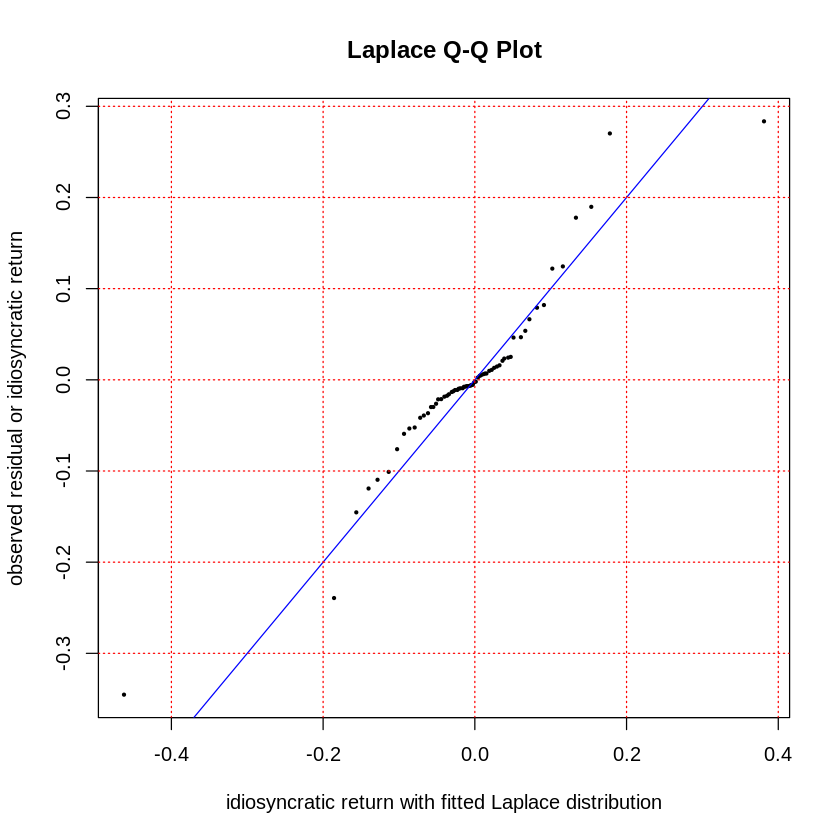

In [0]:
qqplot(r.sim,e
       ,cex=0.5
       ,pch=20
       ,xlab="idiosyncratic return with fitted Laplace distribution"
       ,ylab="observed residual or idiosyncratic return"
       ,main="Laplace Q-Q Plot")

abline(a=0,b=1,col="blue")
grid(col="red")

In [0]:
laplace.test(fit$residuals)$D

[1] 1.06247

The errors in the ln_rt OLS model follow Laplace as seen from the graph and laplace test above.

Now performing Bayesian analysis using stan below with the assumption of errors following Laplace

In [0]:
Spain_data3=na.omit(Spain_data2) #Remove NA values

In [0]:
fit<-recipe(ln_rt~Time+Time2+lock_down,data=Spain_data3)%>%
  prep(data = Spain_data3, retain = TRUE) 

X=juice(fit, all_predictors(), composition = "matrix")
new_X=X
y=drop(juice(fit, all_outcomes(), composition = "matrix"))
N=length(Spain_data3$ln_rt)
K=ncol(X)

In [0]:
write("// Stan model for simple linear regression
// Linear Model with Laplace(Double Exponential) Errors
data {
  // number of observations
  int N;
  // response
  vector[N] y;
  // number of columns in the design matrix X
  int K;
  // design matrix X
  // should not include an intercept
  matrix [N, K] X;
  
}
parameters {
  // regression coefficient vector
  real alpha;
  vector[K] beta;
  real < lower = 0 > sigma;
}
model {
  alpha ~ cauchy(0,1);
  beta ~ cauchy(0,1);
  sigma ~ gamma(1,1);
  y ~ double_exponential(alpha + X * beta, sigma);
}
generated quantities {
  real y_rep[N];  
  
  for (n in 1:N) {
  y_rep[n] =double_exponential_rng(alpha + X[n] * beta, sigma);
  }
}
// The posterior predictive distribution",

"stan_model2.stan")

stan_data=list(N = N, K= K, X = X, new_X=new_X, y = y)
#stanc("stan_model2.stan")
stan_model2="stan_model2.stan"
fit=stan(file = stan_model2, data = stan_data, warmup = 10000, iter = 40000, chains = 4, cores = 2, thin = 10)

So now we have ln_rt~Time+Time2+lock_down model using Bayesian and errors following Laplace assumption.

In [0]:
summary(as.matrix(fit)[,1:5])

     alpha           beta[1]             beta[2]             beta[3]         
 Min.   :0.3624   Min.   :-0.027341   Min.   :7.917e-06   Min.   :-0.205511  
 1st Qu.:0.4526   1st Qu.:-0.015805   1st Qu.:9.362e-05   1st Qu.:-0.065792  
 Median :0.4792   Median :-0.013892   Median :1.118e-04   Median :-0.039027  
 Mean   :0.4833   Mean   :-0.014138   Mean   :1.137e-04   Mean   :-0.036947  
 3rd Qu.:0.5098   3rd Qu.:-0.012233   3rd Qu.:1.319e-04   3rd Qu.:-0.009214  
 Max.   :0.6698   Max.   :-0.004527   Max.   :2.563e-04   Max.   : 0.147023  
     sigma        
 Min.   :0.03229  
 1st Qu.:0.04865  
 Median :0.05284  
 Mean   :0.05348  
 3rd Qu.:0.05766  
 Max.   :0.08614  

In the above summary, alpha, beta1, beta2, beta3 are the coefficient values corresponding to the Intercept, Time, Time2, and lock_down respectively.

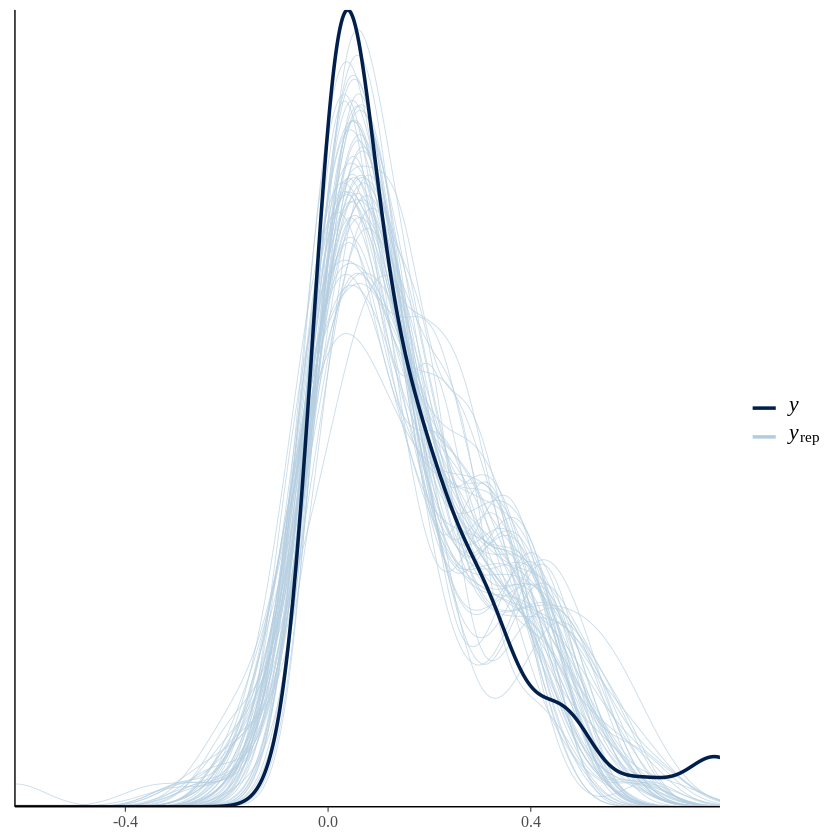

In [0]:
y_rep <- as.matrix(fit, pars = "y_rep")
ppc_dens_overlay(y, y_rep[1:56, ])

Posterior predictive checks suggest the model to be a decent fit

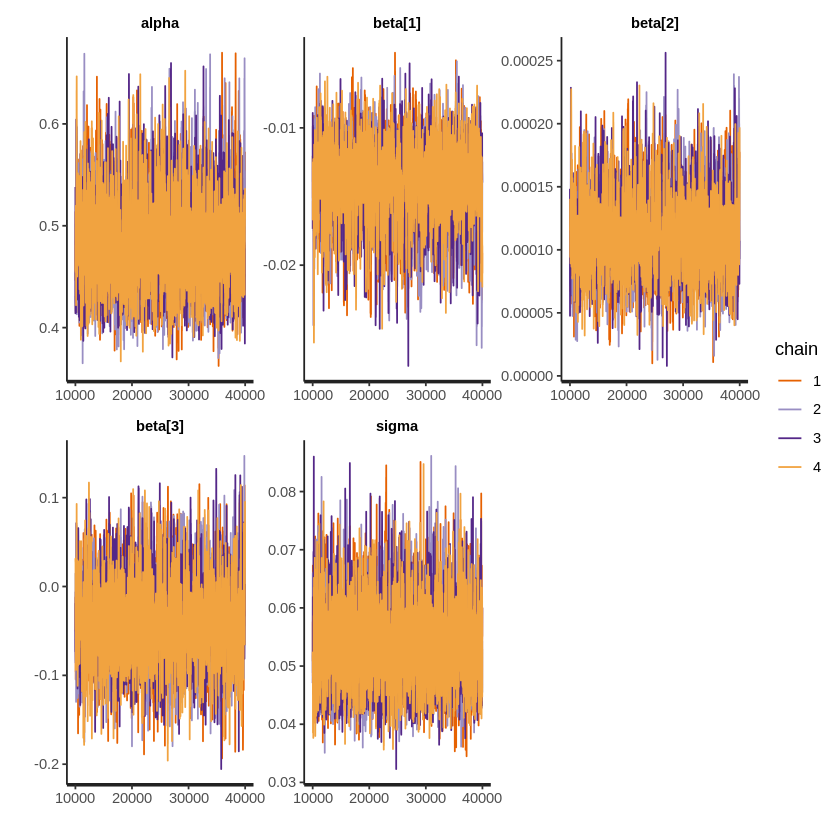

In [0]:
stan_trace(fit,pars=c("alpha","beta","sigma"))

The trace plots show that the model chains have achieved stability.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



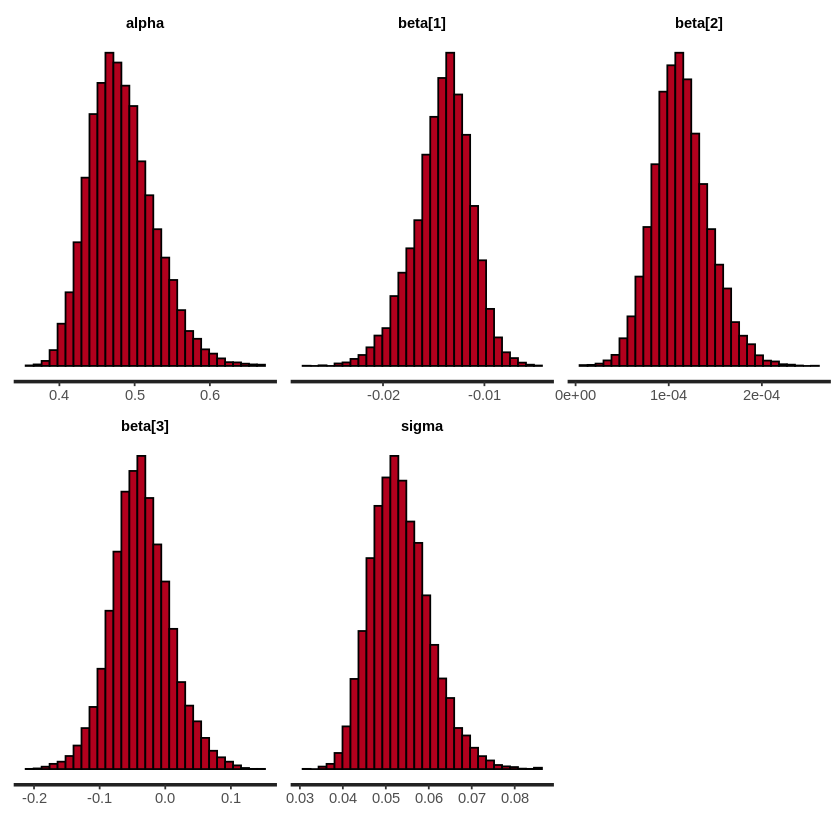

In [0]:
stan_hist(fit,pars=c("alpha","beta","sigma"))

The above histograms give an idea of the coefficient values' distribution.

In [0]:
posterior <- extract(fit)
#Prob that lock_down < 0
sum(posterior$beta[,3]<0)/length(posterior$beta[,3])

[1] 0.8083333

With 0.8 probability, the lock down coefficient value is less than 0 implying a reduction of ln_rt impact.

In [0]:
#The 80, 85 and 90% CI for beta3 i.e. corresponding to lock_down
round(quantile(posterior$beta[,3], probs = c(.1, .9)) ,6)
round(quantile(posterior$beta[,3], probs = c(.075, .925)) ,6)
round(quantile(posterior$beta[,3], probs = c(.05, .95)) ,6)

10%       90% 
-0.090568  0.019409

7.5%     92.5% 
-0.097879  0.028813

5%       95% 
-0.108189  0.040596

All of the CIs above overlap with 0 implying that lock_down is not statistically significant.

##**Main Analysis for Spain**

Now, as discussed in the case of India and Italy, we'll rather look into log of Total Confirmed Cases. And we'll also take into account the various 14 day phases we discussed.

In [0]:
Spain_data2$prd1<-0
Spain_data2$prd2<-0
Spain_data2$prd3<-0
Spain_data2$prd4<-0
Spain_data2$prd1[Spain_data2$Dates>="2020-03-13" & Spain_data2$Dates<="2020-03-26"]<-1
Spain_data2$prd2[Spain_data2$Dates>="2020-03-27" & Spain_data2$Dates<="2020-04-09"]<-1
Spain_data2$prd3[Spain_data2$Dates>="2020-04-10" & Spain_data2$Dates<="2020-04-23"]<-1
Spain_data2$prd4[Spain_data2$Dates>="2020-04-24"]<-1

Note the change in the model below

In [0]:
fit<-lm(log(Total_Confirmed_Cases)~Time+I(prd1*Time)+I(prd2*Time)
        +I(prd3*Time)+I(prd4*Time),data=Spain_data2)
#Note that rather than just taking the periods, I've rather taken their product with time.
#This is because the effect of lockdown in a period won't be the same throughout the period.
#This can also be done with ln_rt
summary(fit)
shapiro.test(fit$residuals)


Call:
lm(formula = log(Total_Confirmed_Cases) ~ Time + I(prd1 * Time) + 
    I(prd2 * Time) + I(prd3 * Time) + I(prd4 * Time), data = Spain_data2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.10125 -0.32982  0.01671  0.35923  1.07953 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     2.56183    0.26072   9.826 4.14e-14 ***
Time            0.31322    0.02590  12.095  < 2e-16 ***
I(prd1 * Time) -0.02025    0.01872  -1.082 0.283693    
I(prd2 * Time) -0.08035    0.02075  -3.872 0.000269 ***
I(prd3 * Time) -0.13194    0.02196  -6.008 1.19e-07 ***
I(prd4 * Time) -0.15958    0.02267  -7.039 2.14e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5528 on 60 degrees of freedom
Multiple R-squared:  0.9687,	Adjusted R-squared:  0.9661 
F-statistic: 371.8 on 5 and 60 DF,  p-value: < 2.2e-16



	Shapiro-Wilk normality test

data:  fit$residuals
W = 0.98787, p-value = 0.7693


Thus for Spain, leaving the first period, all the others were significantly effective in reducing the total confirmed cases, according to the OLS method.

Also the errors follow normality.

Now performing Bayesian analysis using rstanarm.

**Bayesian Regression**

In [0]:
glm_post1 <- stan_glm(log(Total_Confirmed_Cases)~Time+I(prd1*Time)+I(prd2*Time)+I(prd3*Time)+I(prd4*Time)
                      ,data=Spain_data2, family=gaussian, iter=20000, thin =5)

In [0]:
summary(glm_post1)


Model Info:
 function:     stan_glm
 family:       gaussian [identity]
 formula:      log(Total_Confirmed_Cases) ~ Time + I(prd1 * Time) + I(prd2 * 
	   Time) + I(prd3 * Time) + I(prd4 * Time)
 algorithm:    sampling
 sample:       8000 (posterior sample size)
 priors:       see help('prior_summary')
 observations: 66
 predictors:   6

Estimates:
                 mean   sd   10%   50%   90%
(Intercept)     2.6    0.3  2.2   2.6   2.9 
Time            0.3    0.0  0.3   0.3   0.3 
I(prd1 * Time)  0.0    0.0  0.0   0.0   0.0 
I(prd2 * Time) -0.1    0.0 -0.1  -0.1  -0.1 
I(prd3 * Time) -0.1    0.0 -0.2  -0.1  -0.1 
I(prd4 * Time) -0.2    0.0 -0.2  -0.2  -0.1 
sigma           0.6    0.1  0.5   0.6   0.6 

Fit Diagnostics:
           mean   sd   10%   50%   90%
mean_PPD 9.8    0.1  9.6   9.8   9.9  

The mean_ppd is the sample average posterior predictive distribution of the outcome variable (for details see help('summary.stanreg')).

MCMC diagnostics
               mcse Rhat n_eff
(Interce

R hat values above are all 1.0 indicating the sampler to be effective.

In [0]:
round(glm_post1$coefficients,6)

(Intercept)           Time I(prd1 * Time) I(prd2 * Time) I(prd3 * Time) 
      2.580989       0.310817      -0.018640      -0.078493      -0.130322 
I(prd4 * Time) 
     -0.157832

The above values are the estimated coefficient values. We will look at the CI later and its better to consider that in Bayesian analysis.

**Convergence Diagnostics and Model Fit**

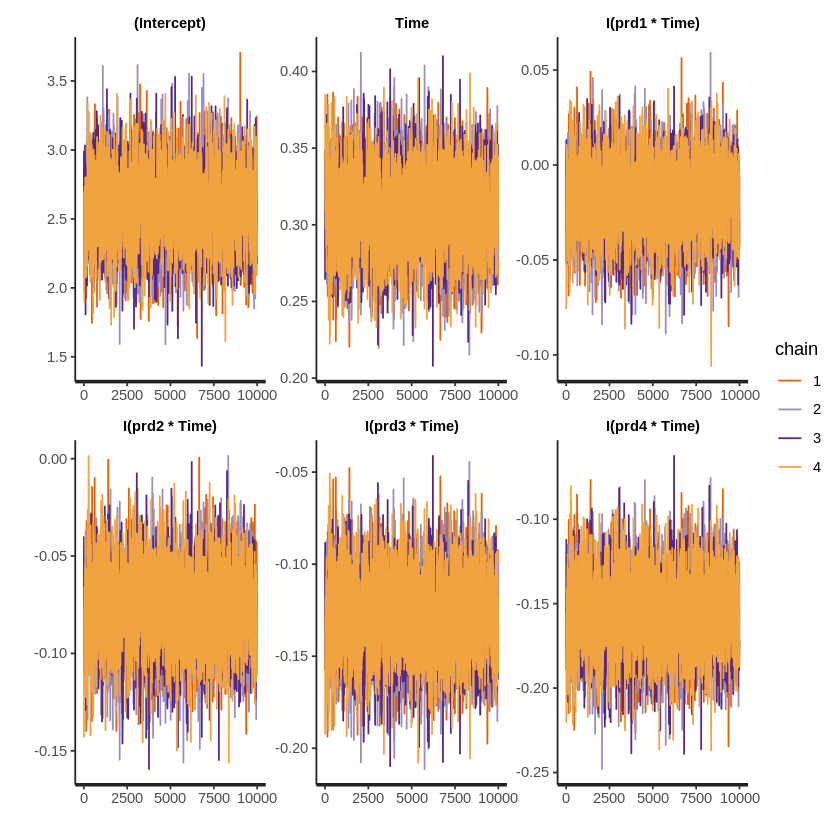

In [0]:
stan_trace(glm_post1)

Trace plots show the chains to have achieved stability and are well mixed.

Warning message:
“Ignoring unknown parameters: fun.y”
No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`



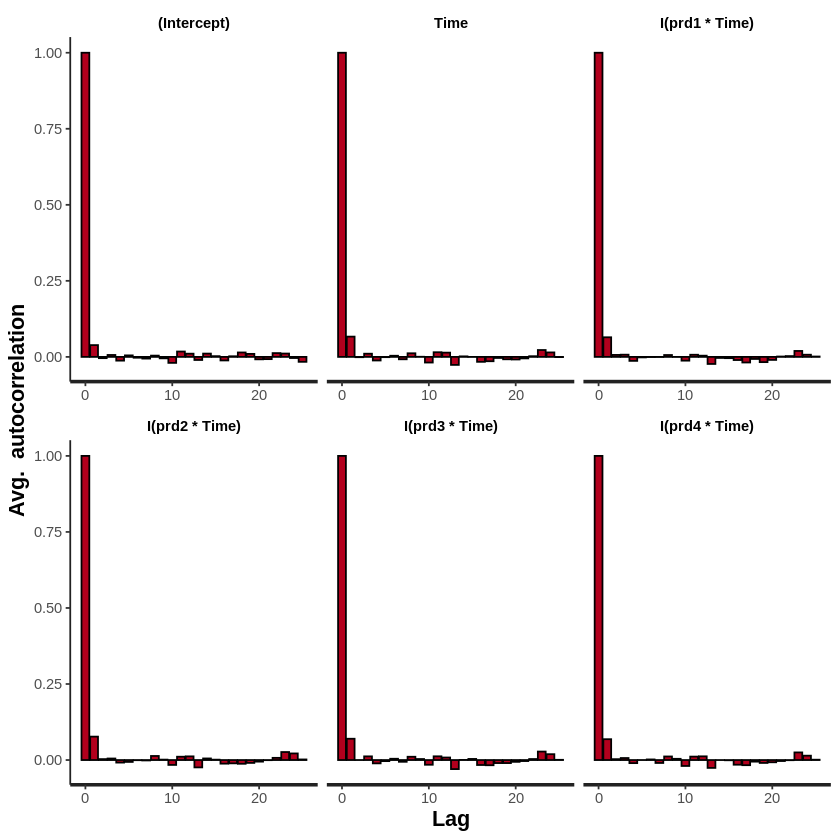

In [0]:
stan_ac(glm_post1)

The ACF plots above show almost no correlation present between the samples suggesting the model to be good.

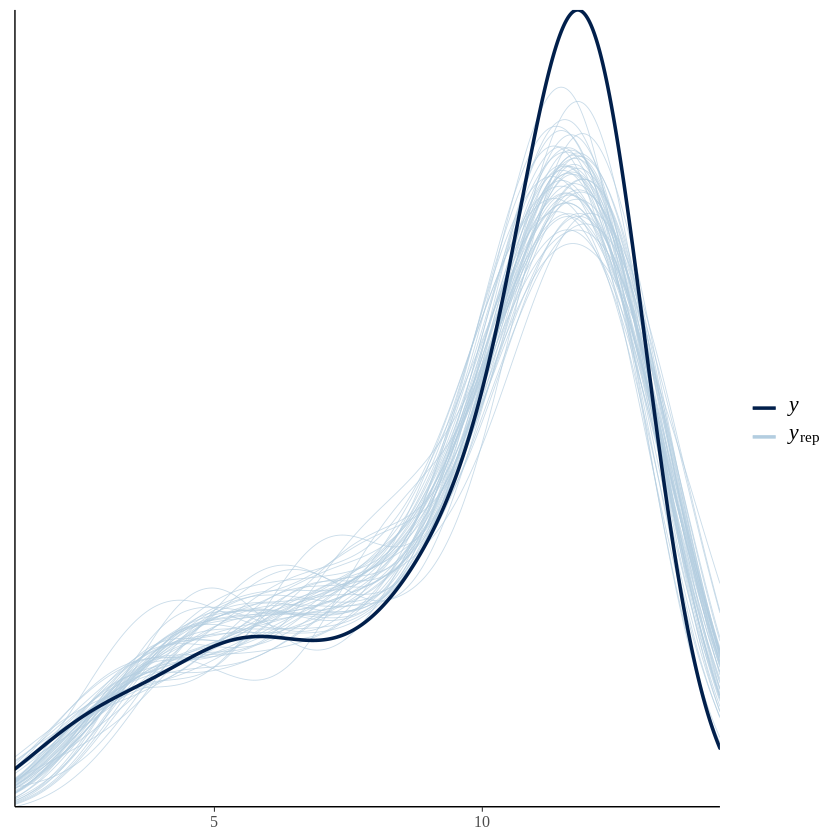

In [0]:
pp_check(glm_post1)


The posterior predictive checks plot above shows the model to be a decent fit

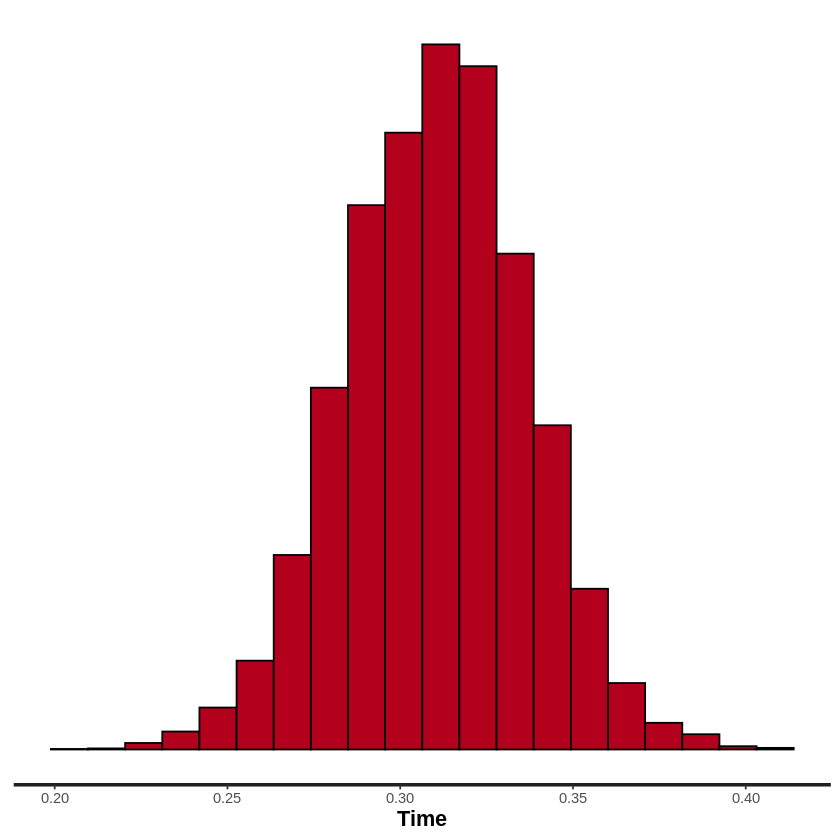

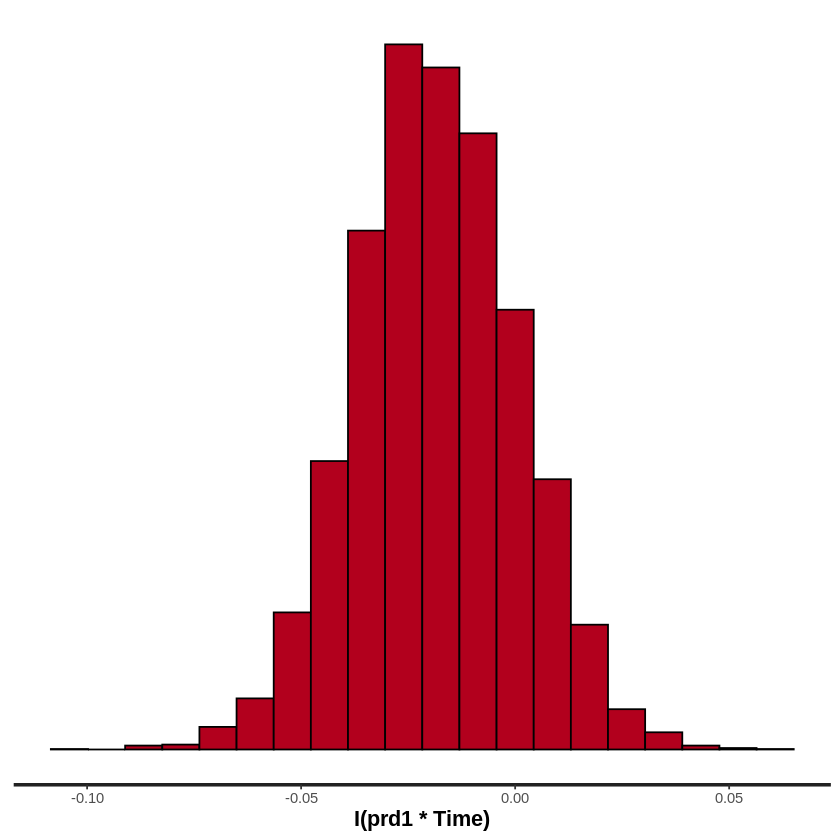

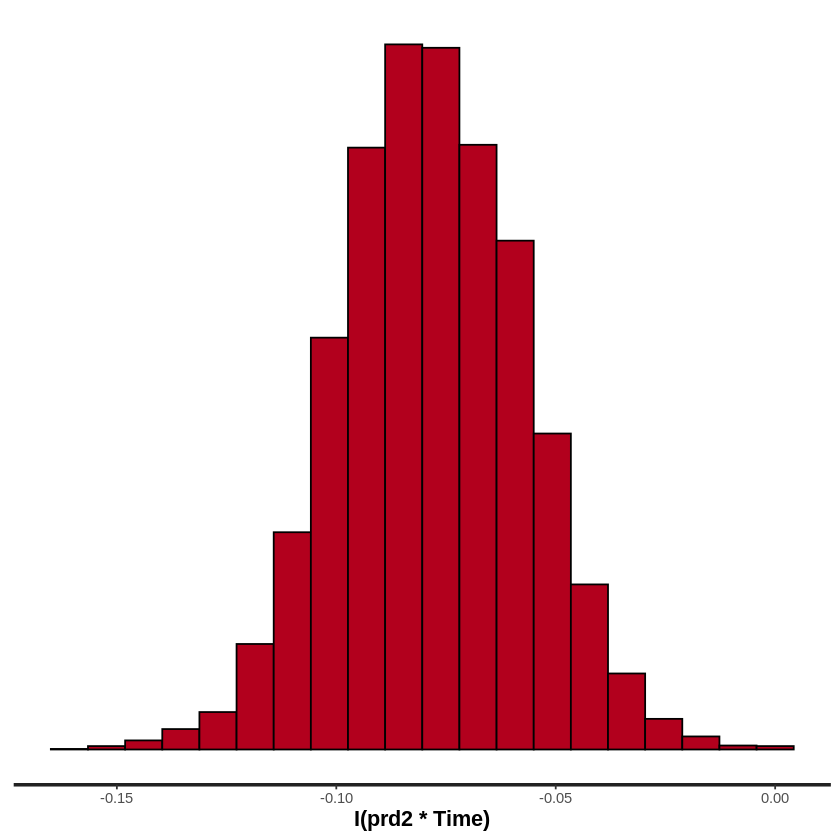

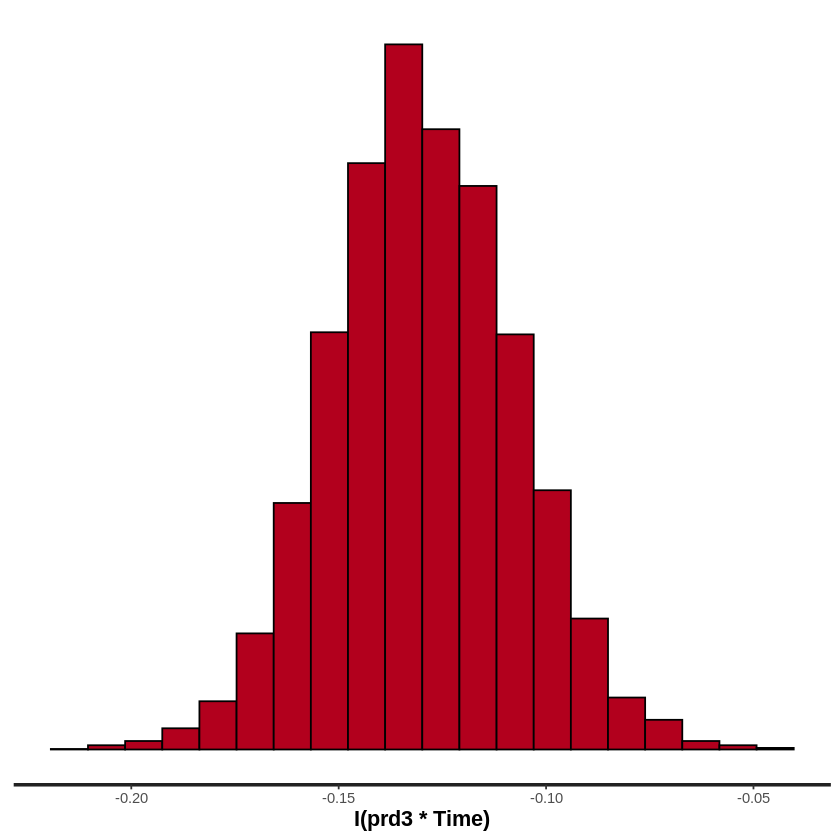

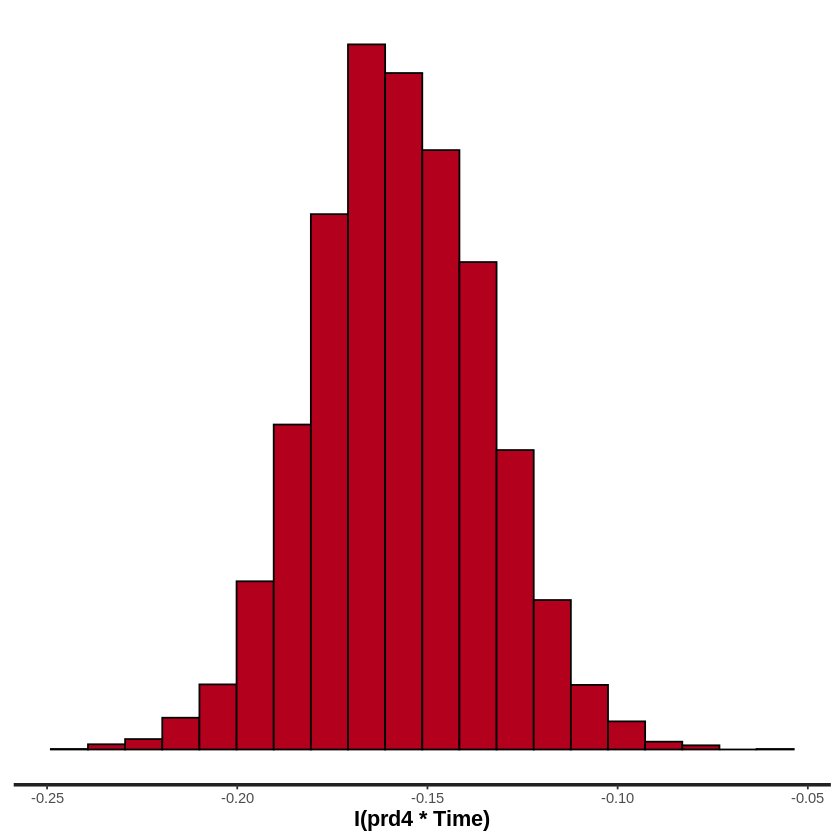

In [0]:
stan_hist(glm_post1, pars=c("Time"),bins=20)
stan_hist(glm_post1, pars=c("I(prd1 * Time)"),bins=20)
stan_hist(glm_post1, pars=c("I(prd2 * Time)"),bins=20)
stan_hist(glm_post1, pars=c("I(prd3 * Time)"),bins=20)
stan_hist(glm_post1, pars=c("I(prd4 * Time)"),bins=20)

The histograms above give an idea of the distribution of coefficient values.

In [0]:
prior_summary(glm_post1)


Priors for model 'glm_post1' 
------
Intercept (after predictors centered)
  Specified prior:
    ~ normal(location = 0, scale = 10)
  Adjusted prior:
    ~ normal(location = 0, scale = 30)

Coefficients
  Specified prior:
    ~ normal(location = [0,0,0,...], scale = [2.5,2.5,2.5,...])
  Adjusted prior:
    ~ normal(location = [0,0,0,...], scale = [0.39,0.73,0.47,...])

Auxiliary (sigma)
  Specified prior:
    ~ exponential(rate = 1)
  Adjusted prior:
    ~ exponential(rate = 0.33)
------
See help('prior_summary.stanreg') for more details

We can take a look at default priors above. The intercept and coefficients both use a normal distribution centered around 0 as a prior, but the distribution for the intercept has higher variance (scale). The error term uses an exponential distribution as a prior.


Drawing from prior...



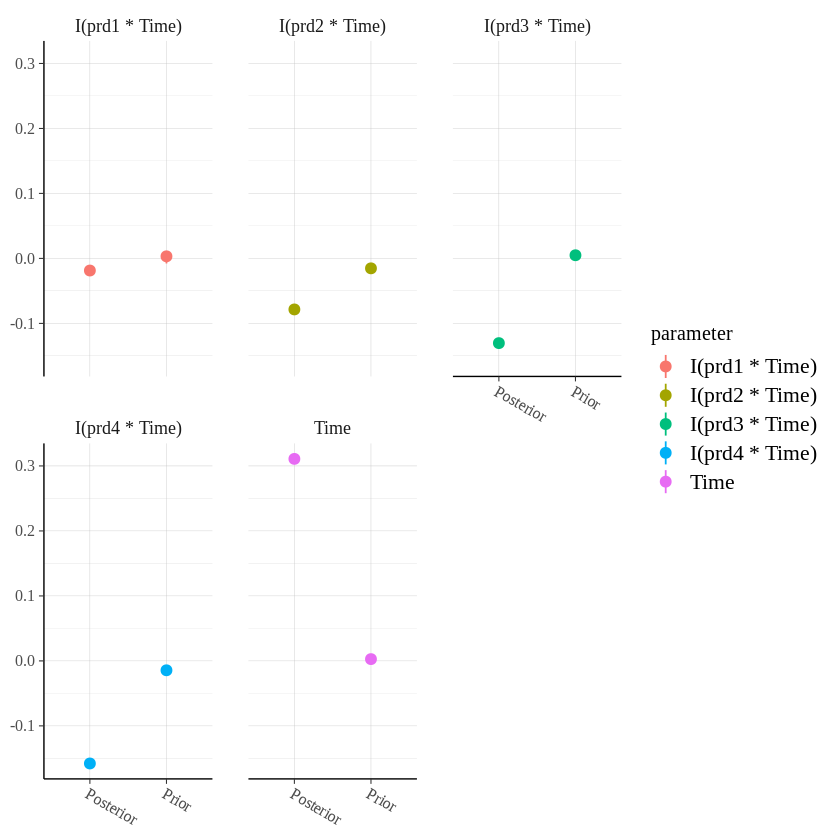

In [0]:
posterior_vs_prior(glm_post1, group_by_parameter = TRUE,prob=0.01, pars=c("Time","I(prd1 * Time)","I(prd2 * Time)","I(prd3 * Time)","I(prd4 * Time)"))

Intervals from the prior distribution and the posterior distribution above show how the observed data has changed the parameter estimates.

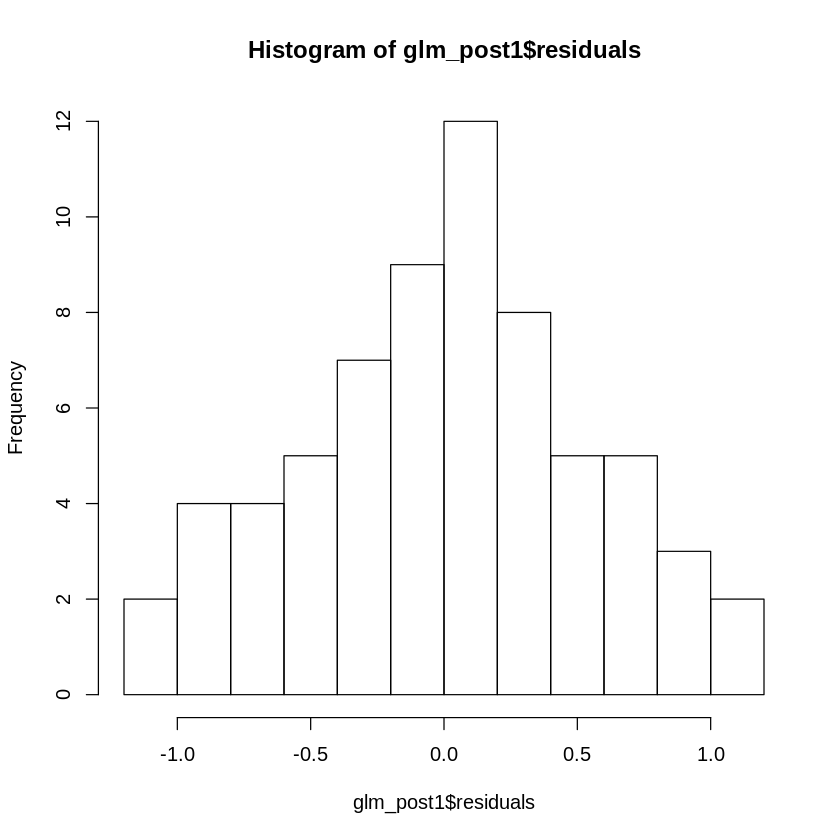

In [0]:
hist(glm_post1$residuals)


The residuals follow normality as seen in the histogram above and also by the test below.

In [0]:
shapiro.test(glm_post1$residuals)


	Shapiro-Wilk normality test

data:  glm_post1$residuals
W = 0.98786, p-value = 0.7688


Residuals follow normality assumption

**Results**

In [0]:
round(posterior_interval(glm_post1, prob = 0.90, pars=c("(Intercept)","Time","I(prd1 * Time)","I(prd2 * Time)","I(prd3 * Time)","I(prd4 * Time)")),6)
#90%CI

5%        95%      
(Intercept)     2.143740  3.022069
Time            0.267401  0.352596
I(prd1 * Time) -0.048847  0.012758
I(prd2 * Time) -0.111437 -0.044347
I(prd3 * Time) -0.165171 -0.093173
I(prd4 * Time) -0.193804 -0.119405

In [0]:
round(posterior_interval(glm_post1, prob = 0.95, pars=c("(Intercept)","Time","I(prd1 * Time)","I(prd2 * Time)","I(prd3 * Time)","I(prd4 * Time)")),6)
#95%CI

2.5%      97.5%    
(Intercept)     2.076166  3.107185
Time            0.259080  0.360746
I(prd1 * Time) -0.055161  0.018227
I(prd2 * Time) -0.118668 -0.037143
I(prd3 * Time) -0.172338 -0.086011
I(prd4 * Time) -0.201264 -0.112226

As the 90% or 95% CI for prd2\*Time, prd3\*Time and  prd4\*Time don't overlap with 0, they show a significant effect on the log(Total_Confirmed_Cases).

Thus after 14 days of being in effect, the lockdown started to show its effect on decreasing the COVID-19 cases in Spain.



---



---



#**Conclusion**

India and other countries took strong public health measures for controlling the spread of the new COVID-19 epidemic. Despite the data being available immediately, accurate answers for predicting the dynamics of the outbreak cannot be obtained that well at this stage. But we can study the effectiveness of lock-down and strict social distancing measures being followed in various countries. 

After studying the incidence rates in India, Italy and Spain, I’ve analysed that in all these 3 countries, lockdown was effective. The effect was not immediate but rather after certain interval of the lockdown being in place. I took 14 days time periods into account to study the effects. Some effect was definitely there from the beginning. But, for India it started being most effective after around 28 days; and for Italy and Spain after around 14 days. 

The lockdown, if implemented correctly in the end, has a high chance of reducing the total number of COVID-19 cases and buy the government invaluable time to prepare its healthcare and disease monitoring system.  All it takes is time; time for government to make arrangements for people's basic needs; time for people to start following the lockdown rules seriously. In India it may have taken more time than Italy and Spain, but at the end it will work out and together we'll rise and be better prepared for such epidemics.



---



---

